/var/folders/_r/j8rq4wtx1vv632jg0nyzvjr00000gn/T/ipykernel_65839/2051586186.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


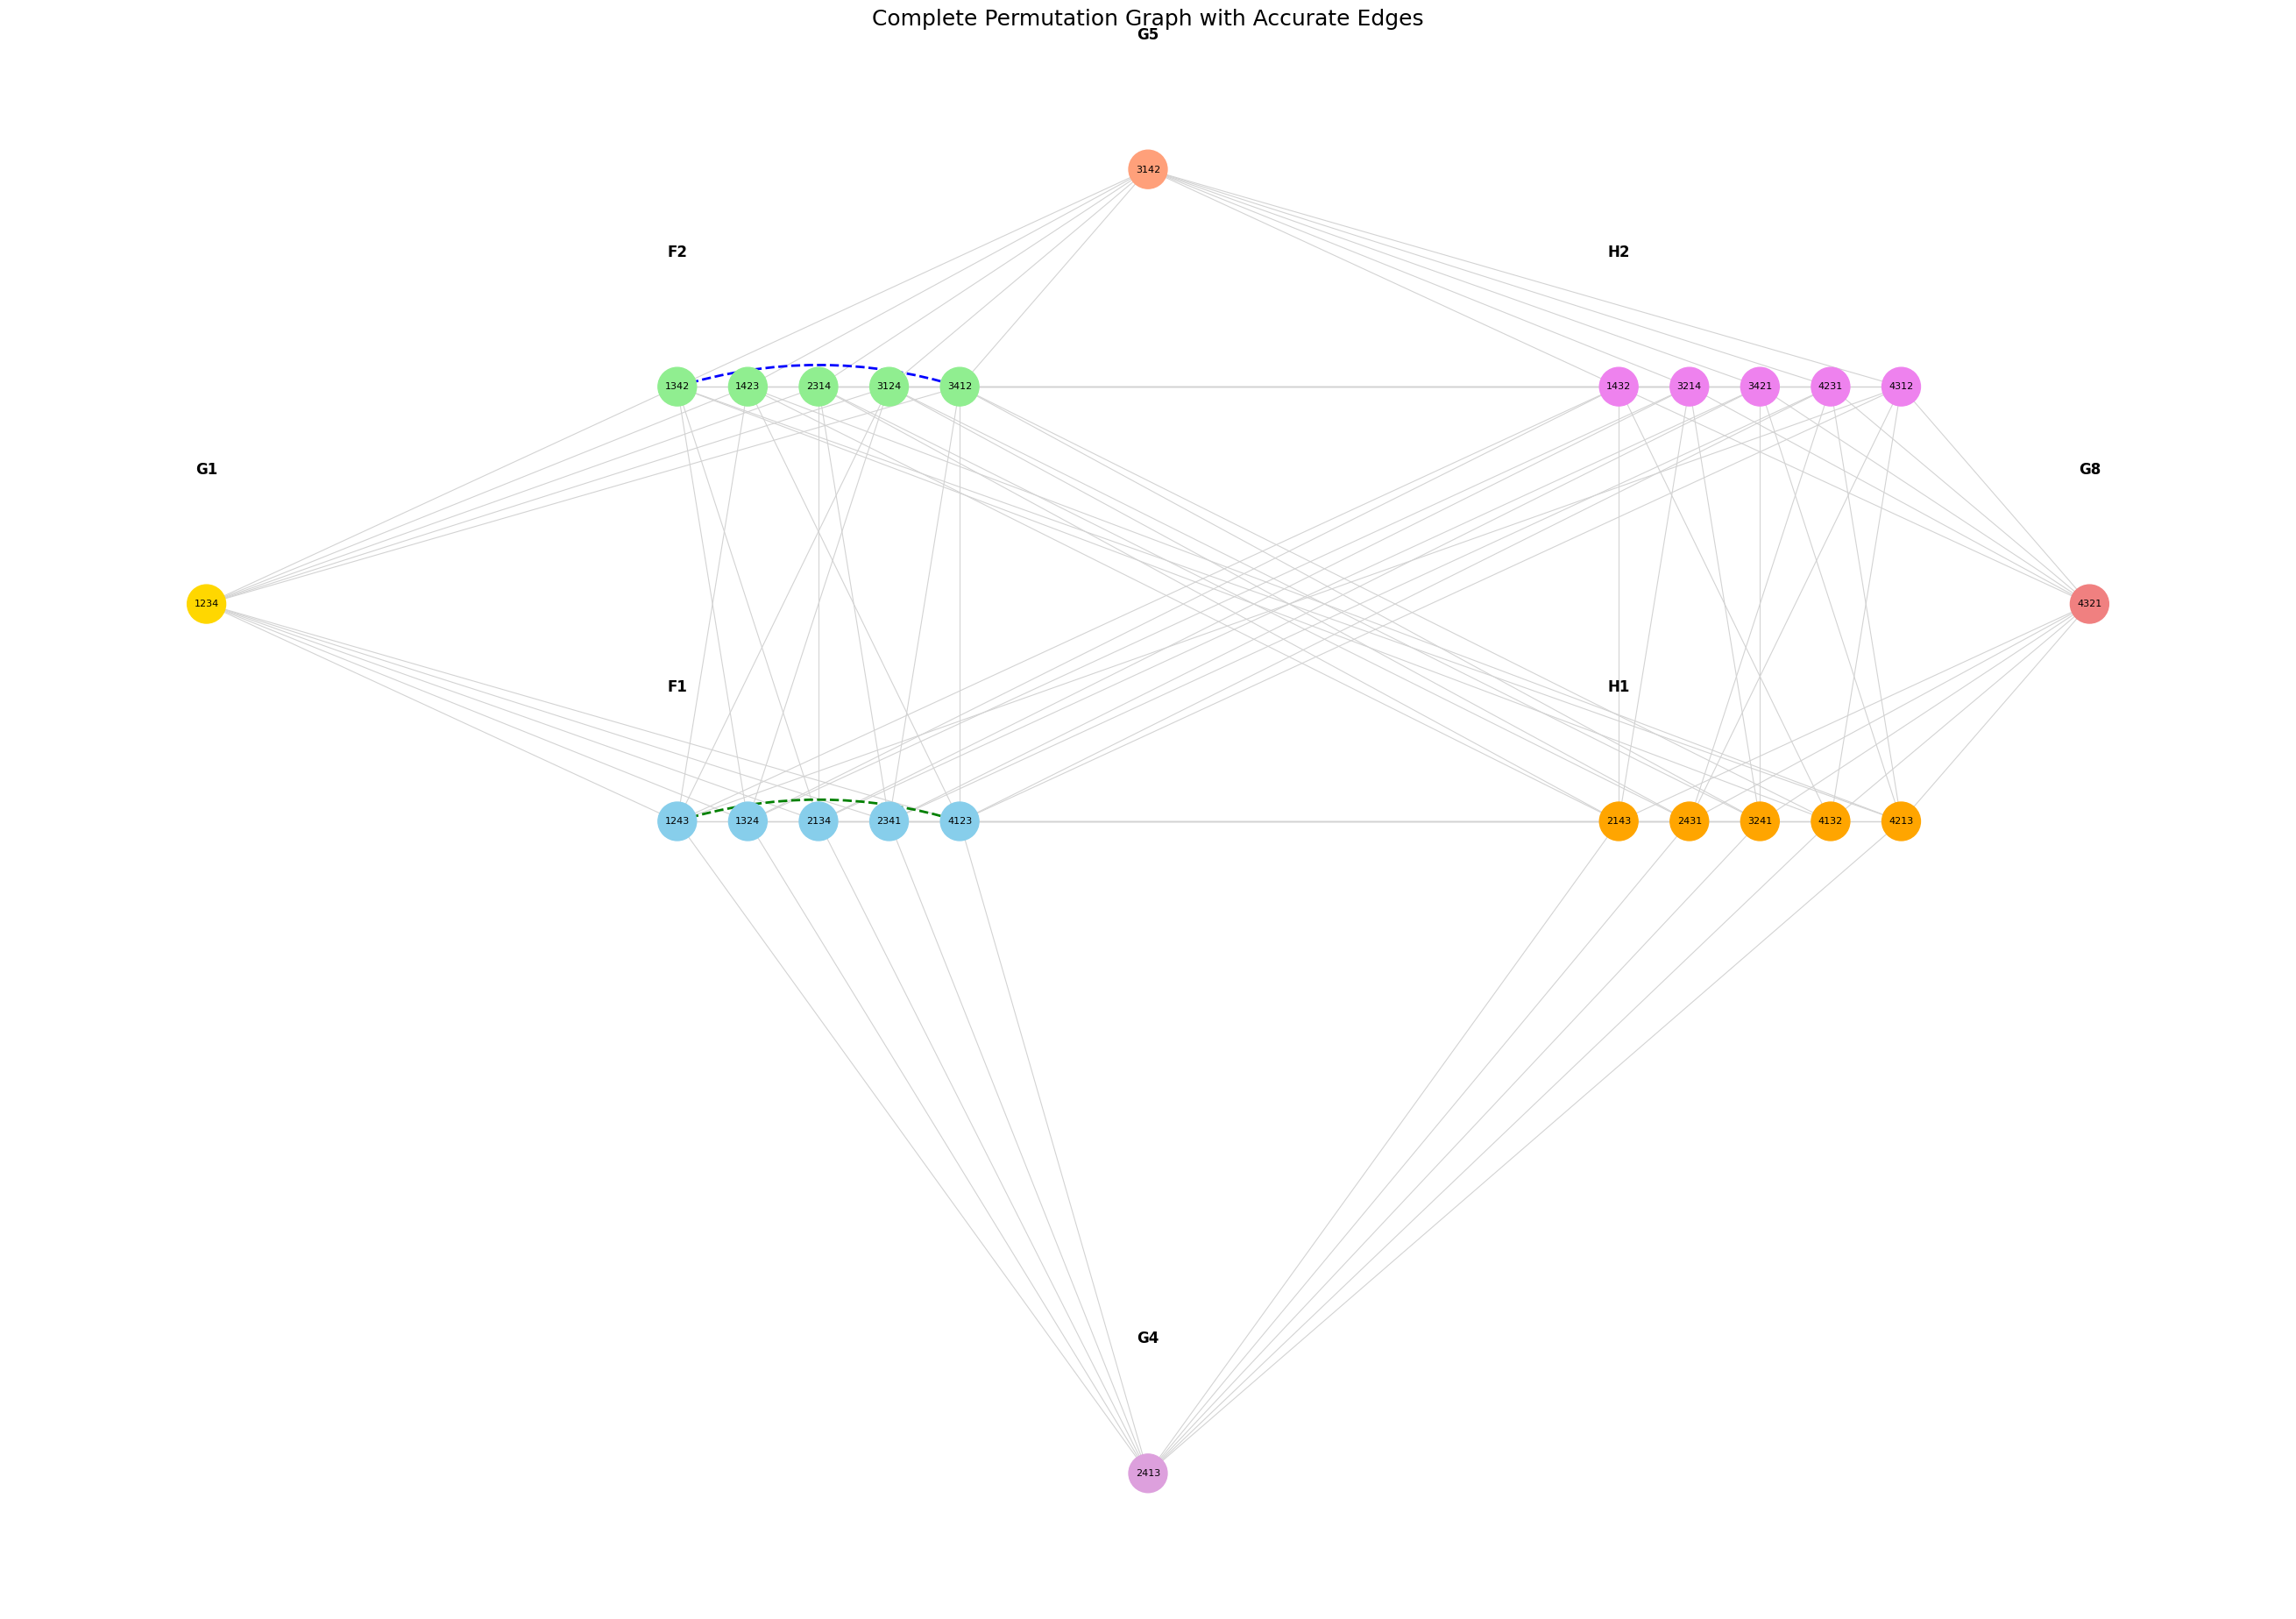

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.path as mpath

# Full edge dictionary (from DrawingGraph.rtf)
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Node grouping and positions
group_nodes = {
    "G1": ["1234"],
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "G4": ["2413"],
    "G5": ["3142"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G8": ["4321"],
}

group_coords = {
    "G1": (1, 3),
    "F1": (2, 2),
    "F2": (2, 4),
    "G4": (3, 1),
    "G5": (3, 5),
    "H1": (4, 2),
    "H2": (4, 4),
    "G8": (5, 3),
}

group_colors = {
    "G1": "gold",
    "F1": "skyblue",
    "F2": "lightgreen",
    "G4": "plum",
    "G5": "lightsalmon",
    "H1": "orange",
    "H2": "violet",
    "G8": "lightcoral",
}

# Node positions and colors
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        node_positions[node] = (x + i * 0.15, y)
        node_colors[node] = group_colors[group]

# Build the graph
G = nx.Graph()
for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw base graph
plt.figure(figsize=(26, 18))
nx.draw(
    G,
    pos=node_positions,
    with_labels=True,
    node_color=[node_colors.get(n, 'white') for n in G.nodes()],
    node_size=1000,
    font_size=8,
    edge_color="lightgray",
    width=0.8
)

# Optional: draw curved example edges
Path = mpath.Path

def draw_curve(ax, p1, p2, color='red'):
    x0, y0 = p1
    x1, y1 = p2
    mx, my = (x0 + x1) / 2, (y0 + y1) / 2 + 0.2
    path_data = [(Path.MOVETO, p1), (Path.CURVE3, (mx, my)), (Path.CURVE3, p2)]
    codes, verts = zip(*path_data)
    patch = patches.PathPatch(Path(verts, codes), edgecolor=color, linewidth=2, fill=False, linestyle='--')
    ax.add_patch(patch)

ax = plt.gca()
draw_curve(ax, node_positions["1342"], node_positions["3412"], color='blue')
draw_curve(ax, node_positions["1243"], node_positions["4123"], color='green')

# Add group labels
for group, (x, y) in group_coords.items():
    plt.text(x, y + 0.6, group, fontsize=12, fontweight='bold', ha='center', color='black')

plt.title("Complete Permutation Graph with Accurate Edges", fontsize=18)
plt.axis("off")
plt.tight_layout()
plt.show()


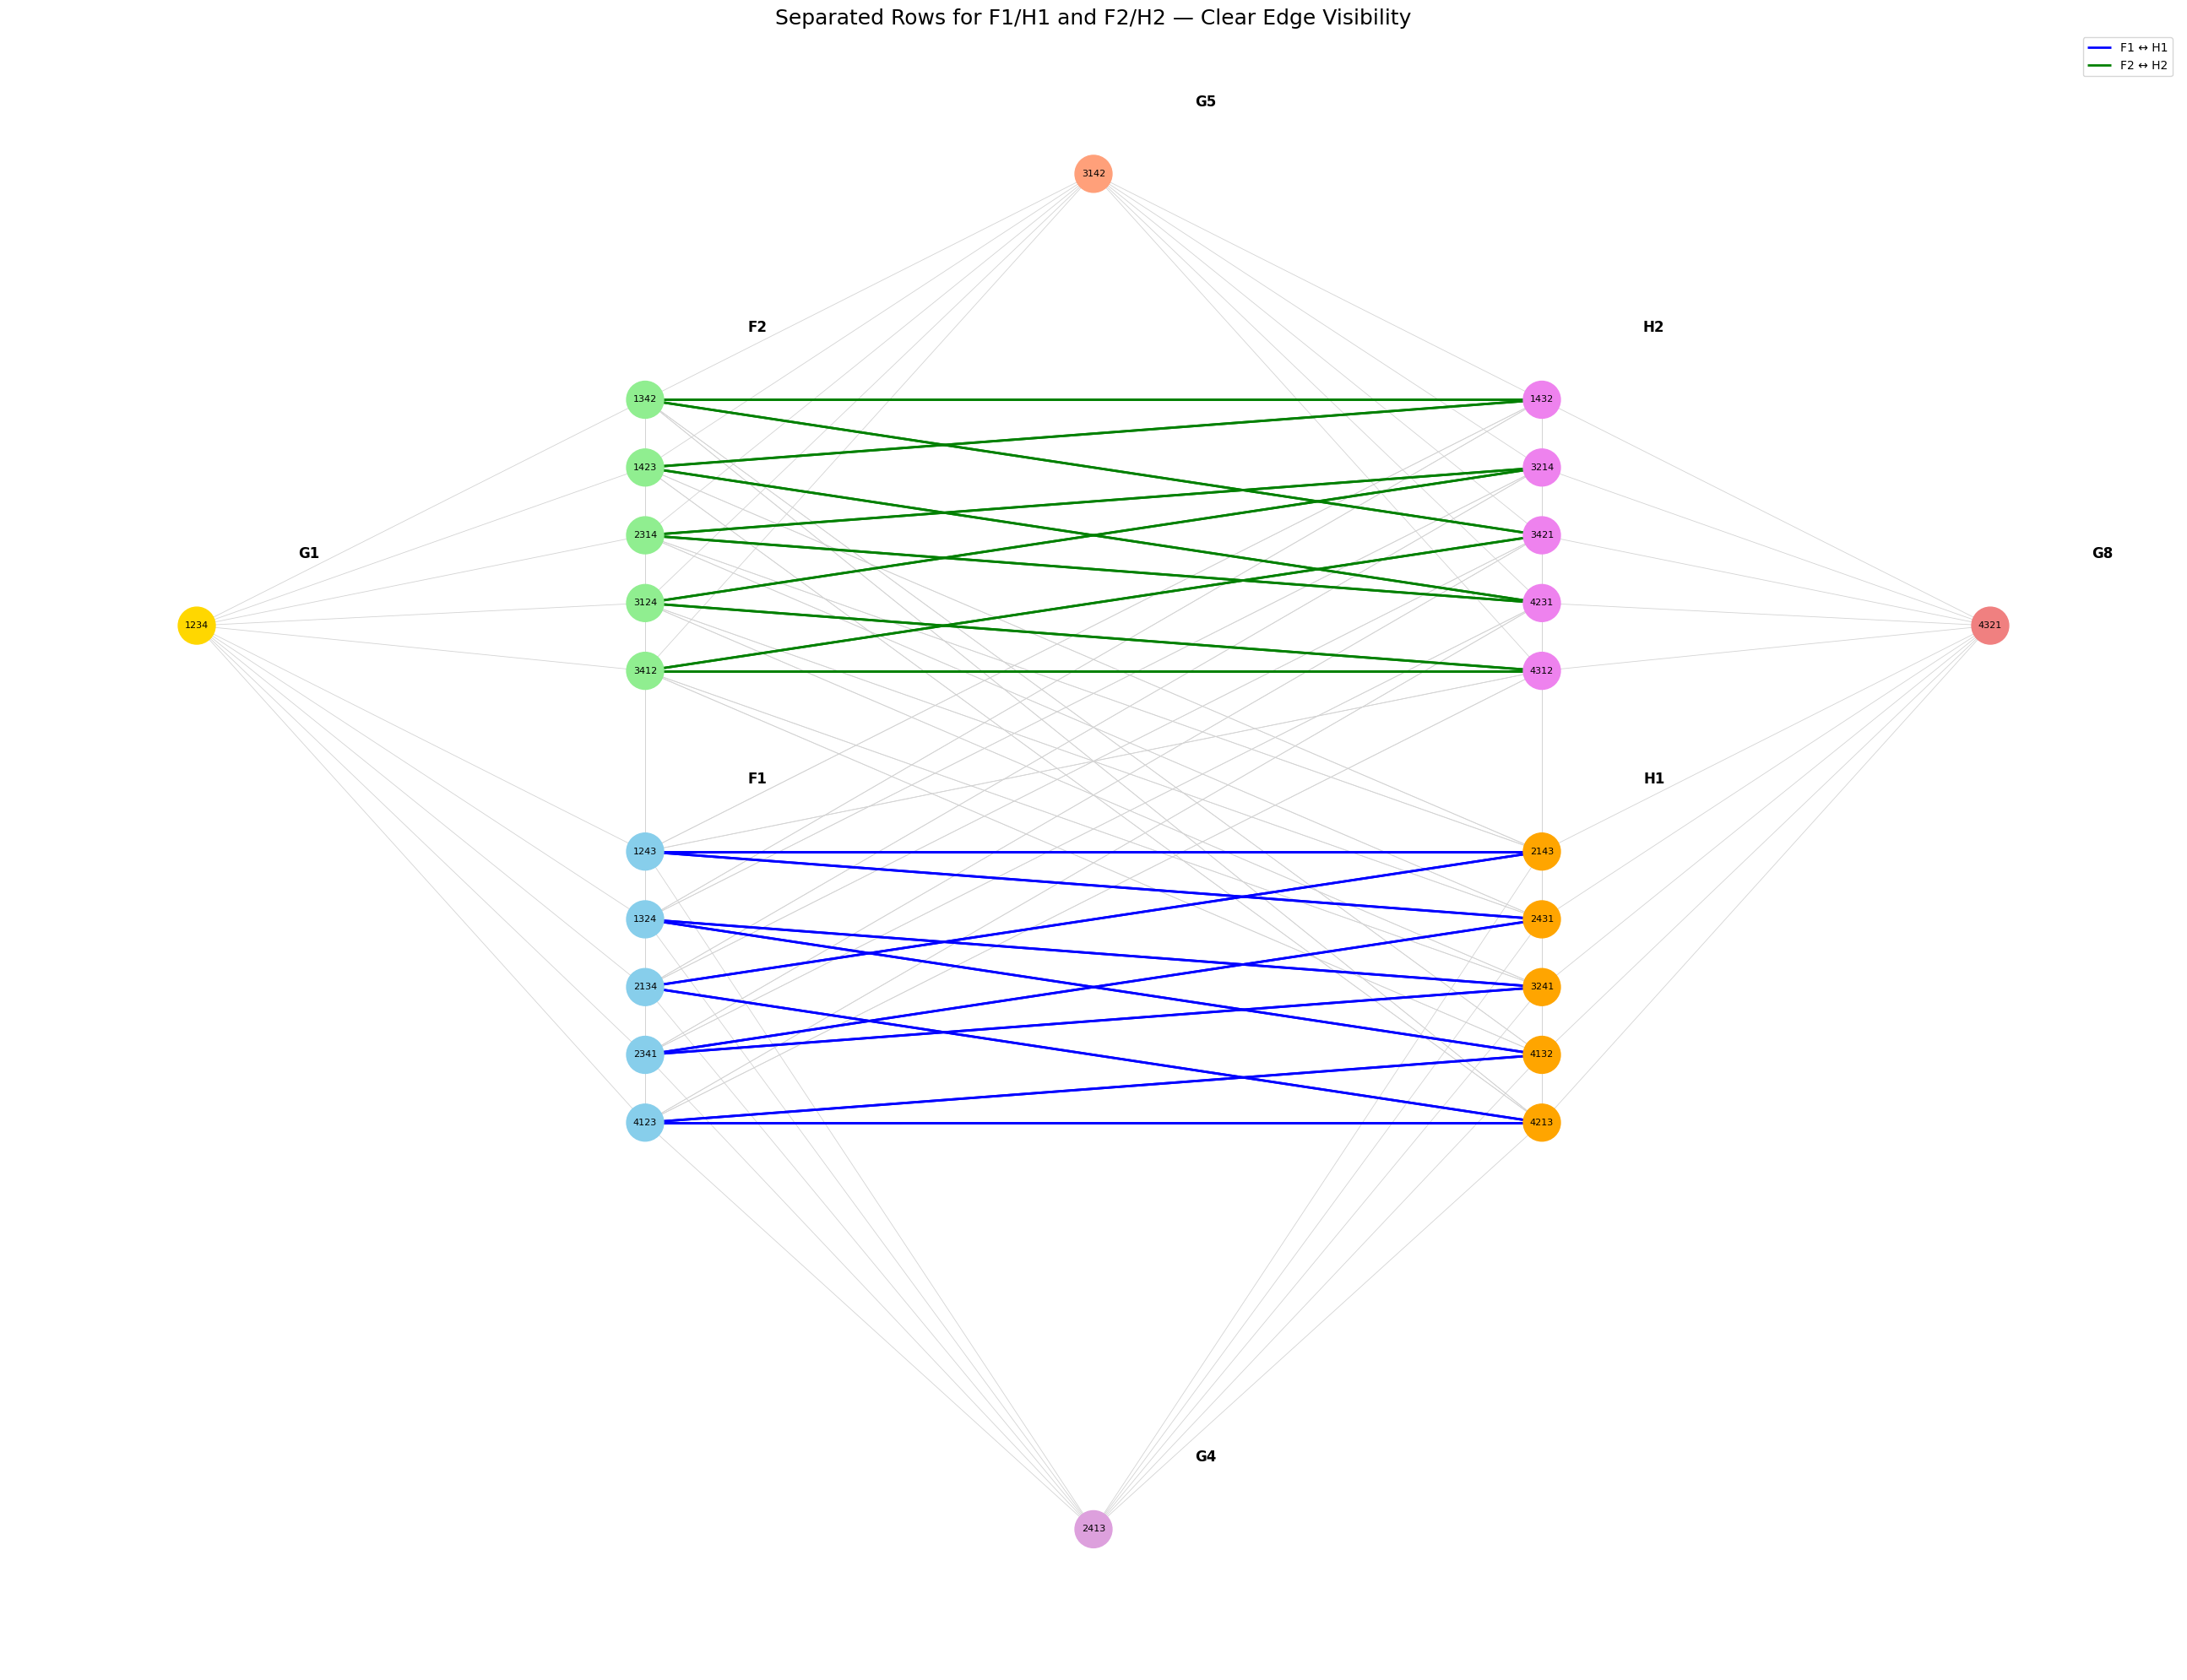

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.path as mpath

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}
group_coords = {
    "G1": (1, 3), "F1": (2, 2), "F2": (2, 4),
    "G4": (3, -1),  # Move G4 lower
    "G5": (3, 5),
    "H1": (4, 2), "H2": (4, 4),
    "G8": (5, 3)
}
group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Key part: updated node_positions for vertical separation
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        # Shift vertically for each node to avoid overlapping edges
        node_positions[node] = (x, y - i * 0.3)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])
f1_to_h1, f2_to_h2, other_edges = [], [], []

for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)
        if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
            f1_to_h1.append((node, neighbor))
        elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
            f2_to_h2.append((node, neighbor))
        else:
            other_edges.append((node, neighbor))

# Draw graph
plt.figure(figsize=(26, 20))
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], node_size=1000)
nx.draw_networkx_labels(G, node_positions, font_size=8)
nx.draw_networkx_edges(G, node_positions, edgelist=other_edges, edge_color="lightgray", width=0.6)
nx.draw_networkx_edges(G, node_positions, edgelist=f1_to_h1, edge_color="blue", width=2, label="F1 ↔ H1")
nx.draw_networkx_edges(G, node_positions, edgelist=f2_to_h2, edge_color="green", width=2, label="F2 ↔ H2")

# Add group labels
for group, (x, y) in group_coords.items():
    plt.text(x + 0.25, y + 0.3, group, fontsize=12, fontweight='bold', ha='center')

plt.title("Separated Rows for F1/H1 and F2/H2 — Clear Edge Visibility", fontsize=18)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()


SPECIAL EDGE ANALYSIS:
Existing special edges: [('1342', '3412'), ('1432', '4312'), ('1243', '4123'), ('2143', '4213')]
Missing special edges: []


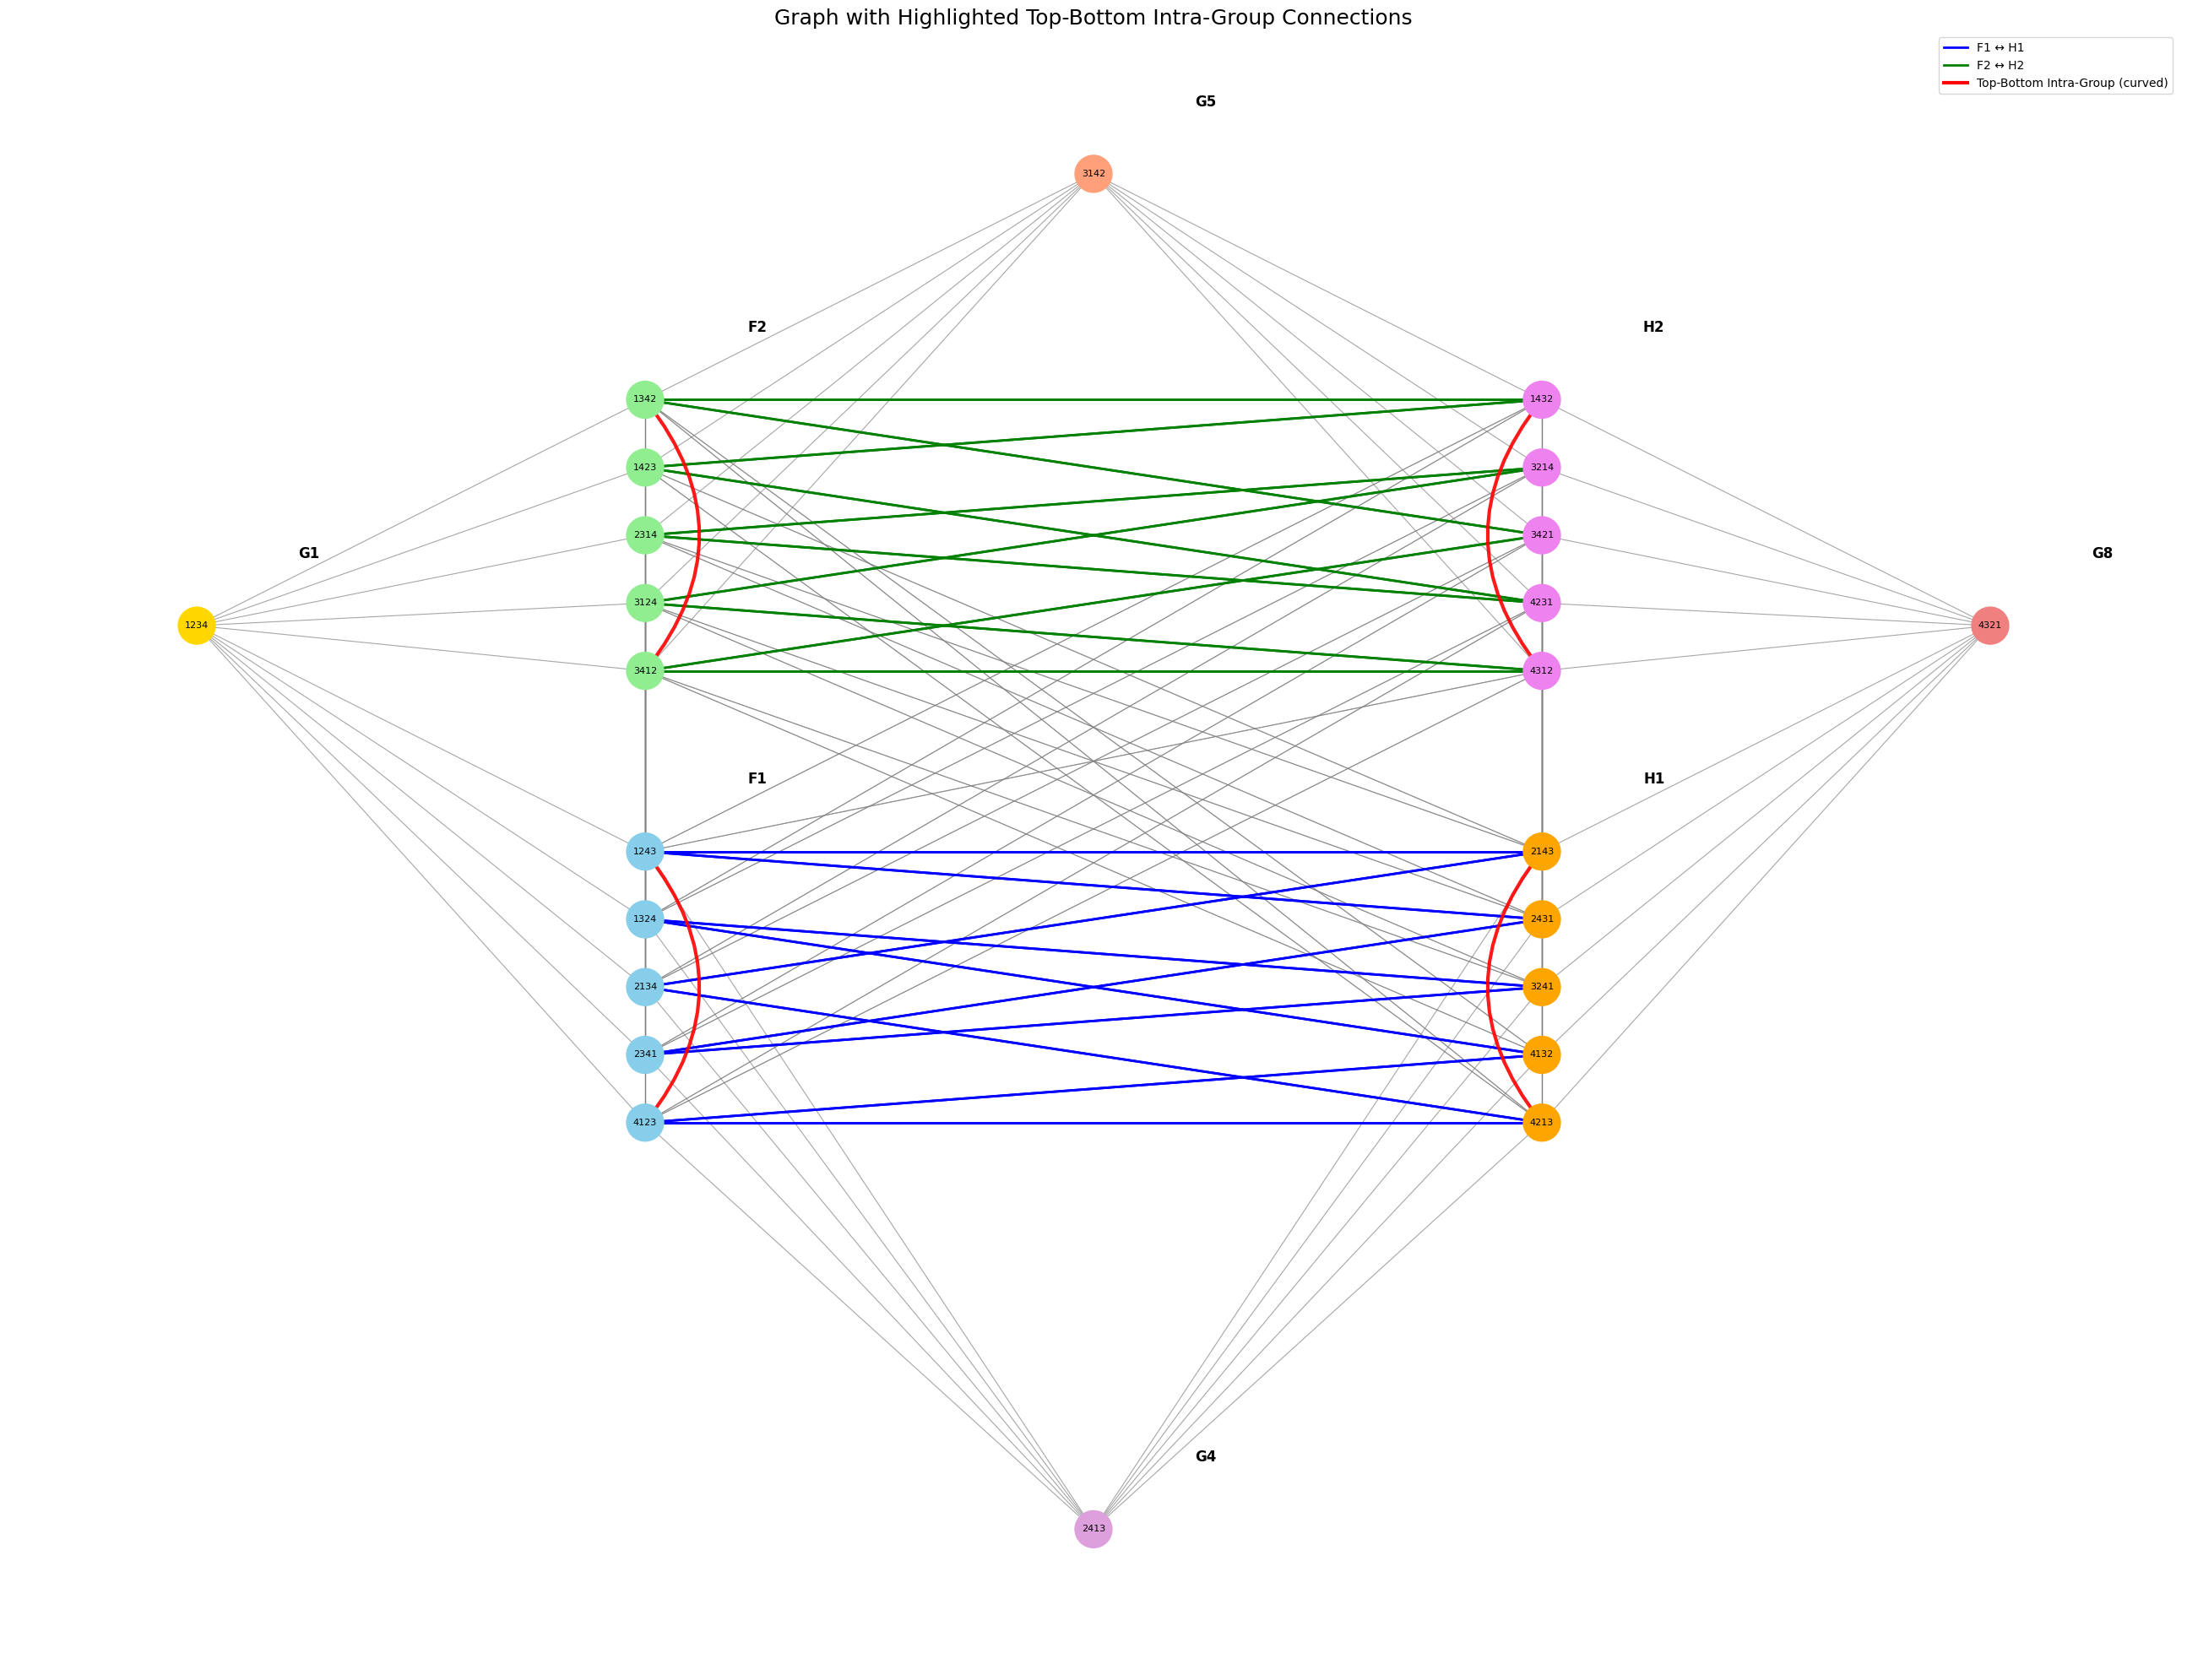

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.path as mpath

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}
group_coords = {
    "G1": (1, 3), "F1": (2, 2), "F2": (2, 4),
    "G4": (3, -1),  # Move G4 lower
    "G5": (3, 5),
    "H1": (4, 2), "H2": (4, 4),
    "G8": (5, 3)
}
group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Key part: updated node_positions for vertical separation
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        # Shift vertically for each node to avoid overlapping edges
        node_positions[node] = (x, y - i * 0.3)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])
f1_to_h1, f2_to_h2, other_edges = [], [], []

# Specific edges to highlight with curves
special_curved_edges = [
    ("1342", "3412"),  # F2: top to bottom
    ("1432", "4312"),  # H2: top to bottom  
    ("1243", "4123"),  # F1: top to bottom
    ("2143", "4213")   # H1: top to bottom
]

for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)
        if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
            f1_to_h1.append((node, neighbor))
        elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
            f2_to_h2.append((node, neighbor))
        else:
            other_edges.append((node, neighbor))

# Remove special curved edges from other_edges to avoid double-drawing
special_edges_set = set(special_curved_edges + [(b, a) for a, b in special_curved_edges])
other_edges = [edge for edge in other_edges if edge not in special_edges_set]

# Verify which special edges actually exist
existing_special_edges = []
missing_special_edges = []
for edge in special_curved_edges:
    if G.has_edge(edge[0], edge[1]):
        existing_special_edges.append(edge)
    else:
        missing_special_edges.append(edge)

print("SPECIAL EDGE ANALYSIS:")
print(f"Existing special edges: {existing_special_edges}")
print(f"Missing special edges: {missing_special_edges}")

# Draw graph
plt.figure(figsize=(26, 20))
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], node_size=1000)
nx.draw_networkx_labels(G, node_positions, font_size=8)

# Draw regular edges with better visibility
nx.draw_networkx_edges(G, node_positions, edgelist=other_edges, edge_color="gray", width=0.8, alpha=0.7)
nx.draw_networkx_edges(G, node_positions, edgelist=f1_to_h1, edge_color="blue", width=2, label="F1 ↔ H1")
nx.draw_networkx_edges(G, node_positions, edgelist=f2_to_h2, edge_color="green", width=2, label="F2 ↔ H2")

# Draw special curved edges manually using matplotlib patches
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch

for edge in existing_special_edges:
    pos1, pos2 = node_positions[edge[0]], node_positions[edge[1]]
    
    # Determine curve direction based on group position
    if pos1[0] < 3:  # Left side (F1, F2)
        # Curve to the left
        mid_x = (pos1[0] + pos2[0]) / 2 - 0.4
    else:  # Right side (H1, H2)
        # Curve to the right
        mid_x = (pos1[0] + pos2[0]) / 2 + 0.4
    
    mid_y = (pos1[1] + pos2[1]) / 2
    
    # Create curved path using FancyArrowPatch
    arrow = FancyArrowPatch(pos1, pos2,
                           connectionstyle=f"arc3,rad={'-.4' if pos1[0] < 3 else '.4'}",
                           arrowstyle="-", 
                           color="red", 
                           linewidth=3,
                           alpha=0.9)
    plt.gca().add_patch(arrow)

# Add group labels
for group, (x, y) in group_coords.items():
    plt.text(x + 0.25, y + 0.3, group, fontsize=12, fontweight='bold', ha='center')

# Create legend
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], color='blue', linewidth=2, label='F1 ↔ H1'),
    mlines.Line2D([], [], color='green', linewidth=2, label='F2 ↔ H2'),
    mlines.Line2D([], [], color='red', linewidth=3, label='Top-Bottom Intra-Group (curved)')
]

plt.title("Graph with Highlighted Top-Bottom Intra-Group Connections", fontsize=18)
plt.axis("off")
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

EDGE ANALYSIS:
F1 ↔ H1 connections: 20
F2 ↔ H2 connections: 20
F1 ↔ F2 connections: 20
H1 ↔ H2 connections: 20
Intra-group connections: 40
Other connections: 80
F1 intra-group: 10 connections
F2 intra-group: 10 connections
H1 intra-group: 10 connections
H2 intra-group: 10 connections

Special curved edges found: 4
Missing special edges: 0


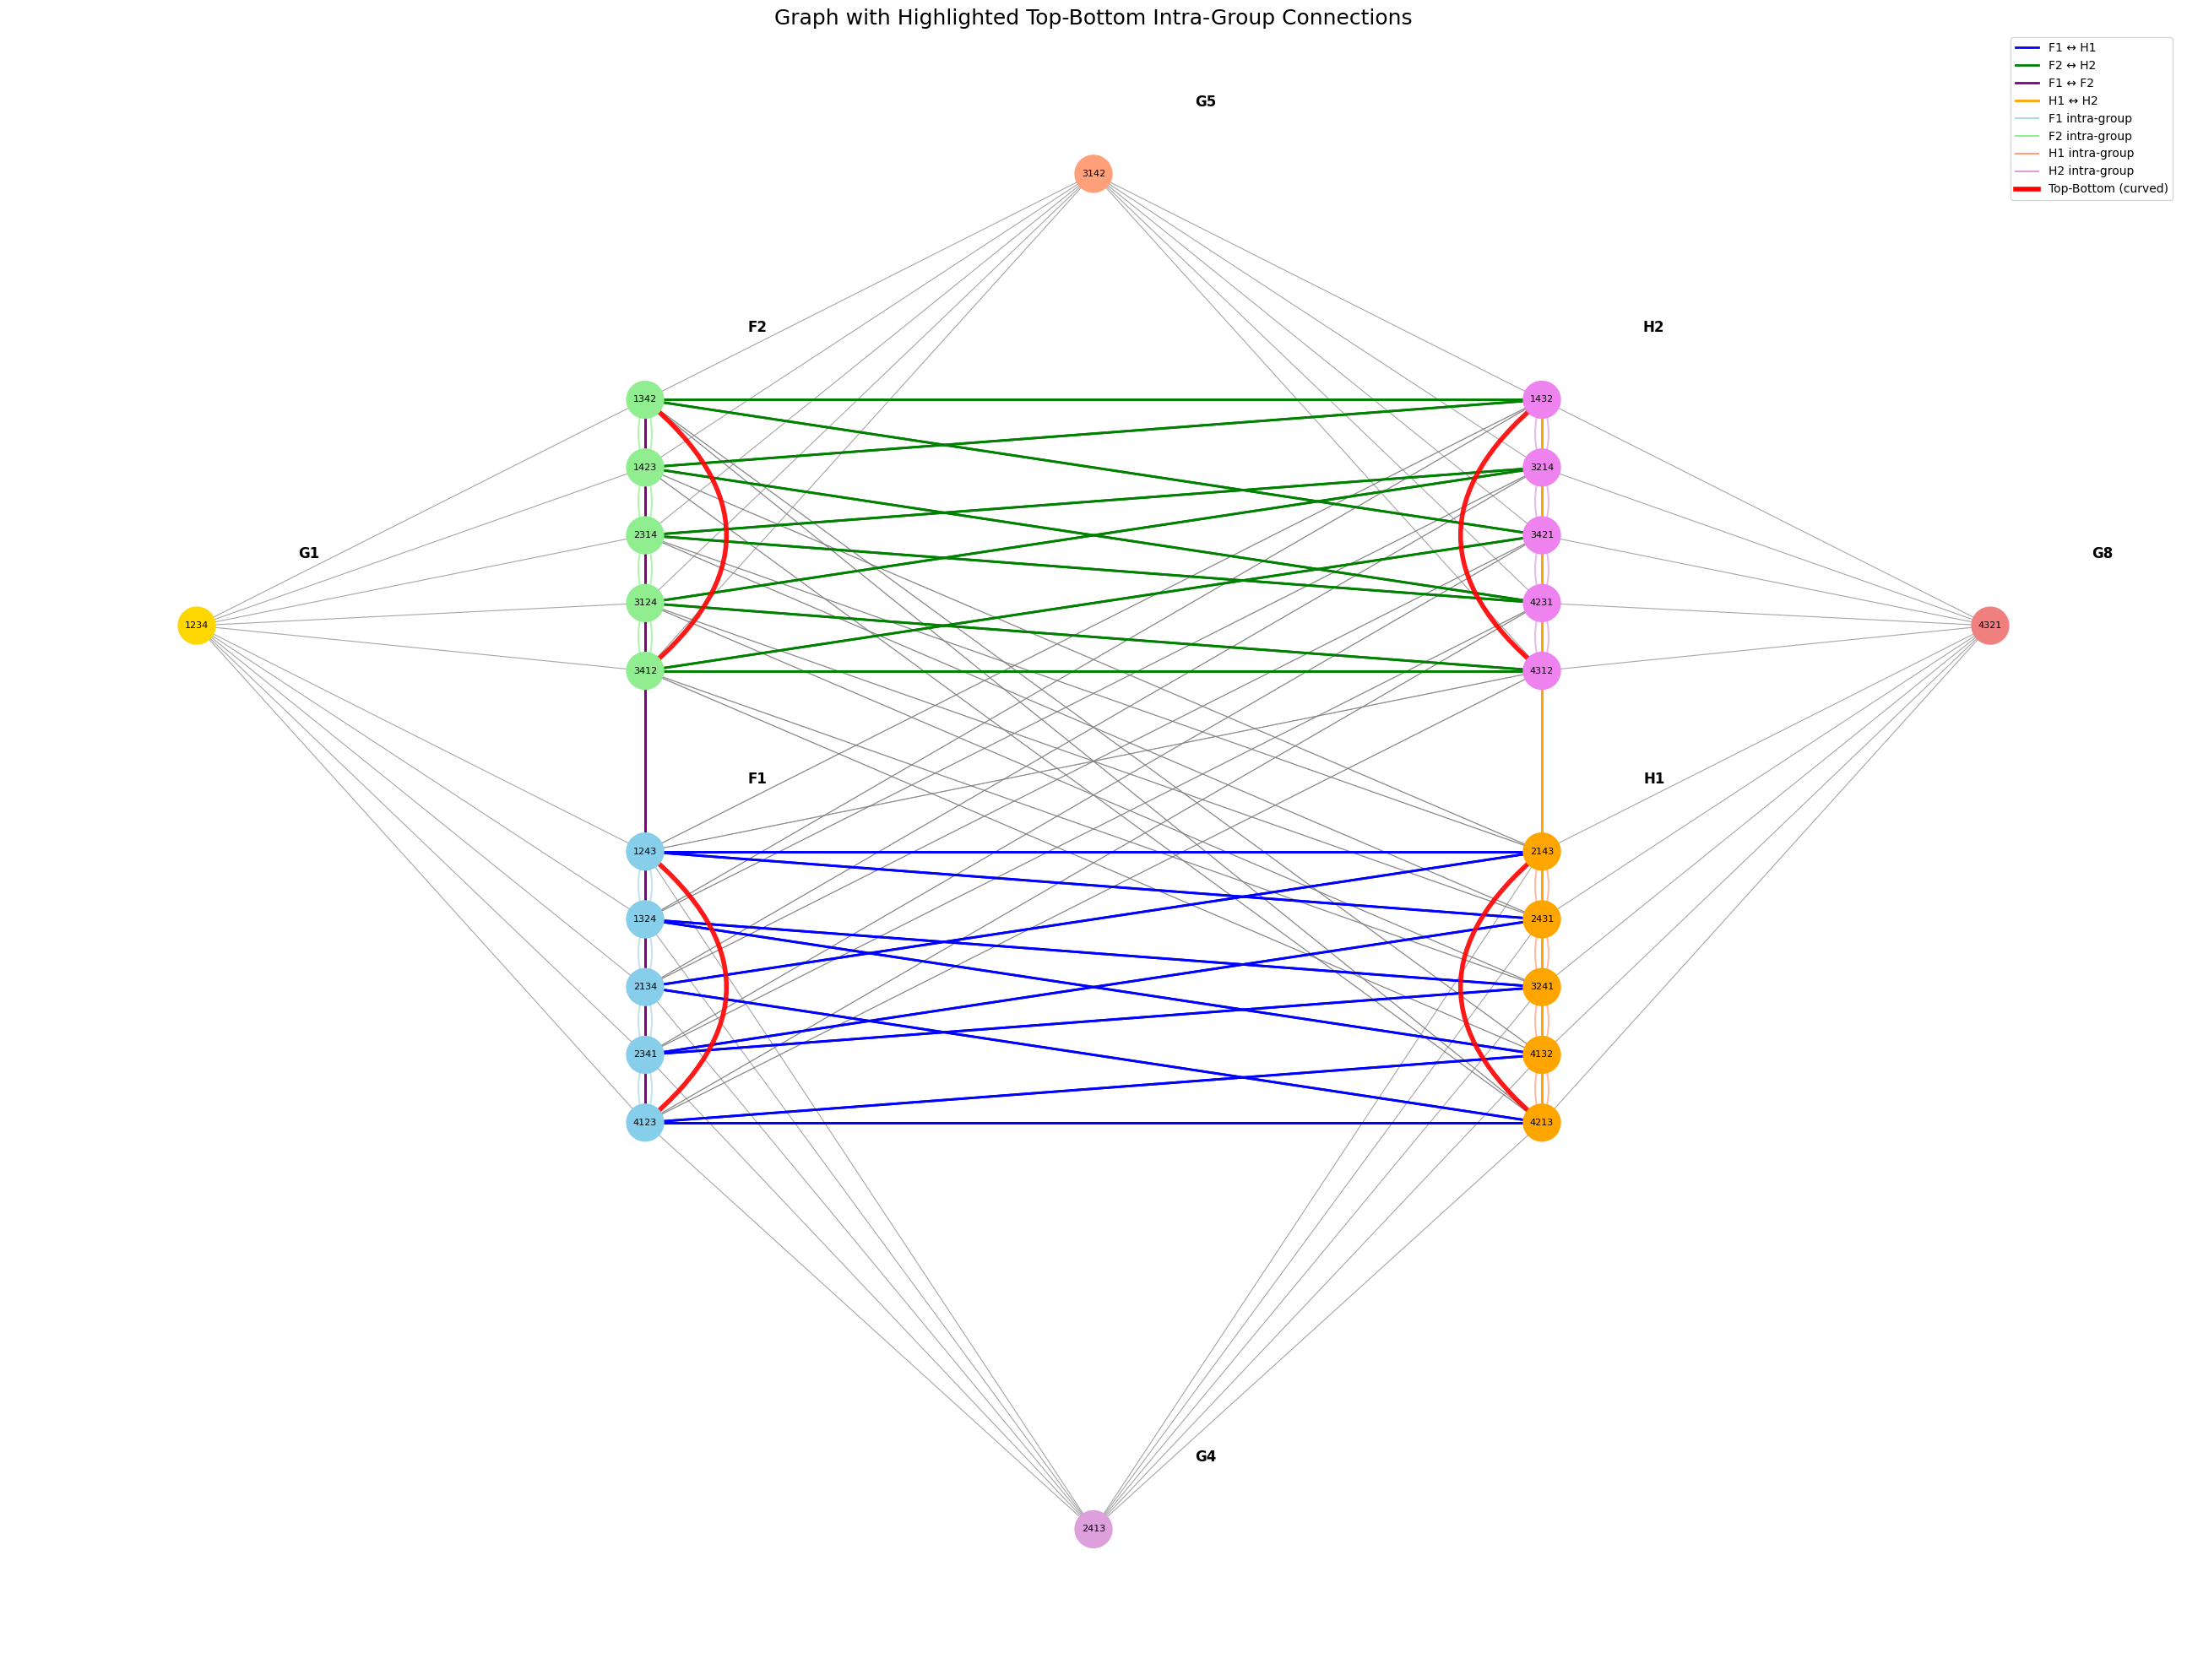

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.path as mpath

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}
group_coords = {
    "G1": (1, 3), "F1": (2, 2), "F2": (2, 4),
    "G4": (3, -1),  # Move G4 lower
    "G5": (3, 5),
    "H1": (4, 2), "H2": (4, 4),
    "G8": (5, 3)
}
group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Key part: updated node_positions for vertical separation
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        # Shift vertically for each node to avoid overlapping edges
        node_positions[node] = (x, y - i * 0.3)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])
f1_to_h1, f2_to_h2, f1_to_f2, h1_to_h2, intra_group_edges, other_edges = [], [], [], [], [], []

# Function to get group of a node
def get_node_group(node):
    for group, nodes in group_nodes.items():
        if node in nodes:
            return group
    return None

# Specific edges to highlight with strong curves (top-bottom connections)
special_curved_edges = [
    ("1342", "3412"),  # F2: top to bottom
    ("1432", "4312"),  # H2: top to bottom  
    ("1243", "4123"),  # F1: top to bottom
    ("2143", "4213")   # H1: top to bottom
]

for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)
        
        node_group = get_node_group(node)
        neighbor_group = get_node_group(neighbor)
        
        if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
            f1_to_h1.append((node, neighbor))
        elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
            f2_to_h2.append((node, neighbor))
        elif (node in f1 and neighbor in f2) or (node in f2 and neighbor in f1):
            f1_to_f2.append((node, neighbor))
        elif (node in h1 and neighbor in h2) or (node in h2 and neighbor in h1):
            h1_to_h2.append((node, neighbor))
        elif node_group == neighbor_group and node_group in ["F1", "F2", "H1", "H2"]:
            # This is an intra-group connection within F1, F2, H1, or H2
            intra_group_edges.append((node, neighbor))
        else:
            other_edges.append((node, neighbor))

# Remove special curved edges from other_edges to avoid double-drawing
special_edges_set = set(special_curved_edges + [(b, a) for a, b in special_curved_edges])
other_edges = [edge for edge in other_edges if edge not in special_edges_set]

print("EDGE ANALYSIS:")
print(f"F1 ↔ H1 connections: {len(f1_to_h1)}")
print(f"F2 ↔ H2 connections: {len(f2_to_h2)}")
print(f"F1 ↔ F2 connections: {len(f1_to_f2)}")
print(f"H1 ↔ H2 connections: {len(h1_to_h2)}")
print(f"Intra-group connections: {len(intra_group_edges)}")
print(f"Other connections: {len(other_edges)}")

# Analyze intra-group connections by group
for group_name in ["F1", "F2", "H1", "H2"]:
    group_connections = [edge for edge in intra_group_edges if 
                        (edge[0] in group_nodes[group_name] and edge[1] in group_nodes[group_name])]
    print(f"{group_name} intra-group: {len(group_connections)} connections")

# Verify which special edges actually exist
existing_special_edges = []
missing_special_edges = []
for edge in special_curved_edges:
    if G.has_edge(edge[0], edge[1]):
        existing_special_edges.append(edge)
    else:
        missing_special_edges.append(edge)

print(f"\nSpecial curved edges found: {len(existing_special_edges)}")
print(f"Missing special edges: {len(missing_special_edges)}")

# Draw graph
plt.figure(figsize=(26, 20))
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], node_size=1000)
nx.draw_networkx_labels(G, node_positions, font_size=8)

# Draw regular edges with better visibility
nx.draw_networkx_edges(G, node_positions, edgelist=other_edges, edge_color="gray", width=0.8, alpha=0.7)
nx.draw_networkx_edges(G, node_positions, edgelist=f1_to_h1, edge_color="blue", width=2, label="F1 ↔ H1")
nx.draw_networkx_edges(G, node_positions, edgelist=f2_to_h2, edge_color="green", width=2, label="F2 ↔ H2")
nx.draw_networkx_edges(G, node_positions, edgelist=f1_to_f2, edge_color="purple", width=2, label="F1 ↔ F2")
nx.draw_networkx_edges(G, node_positions, edgelist=h1_to_h2, edge_color="orange", width=2, label="H1 ↔ H2")

# Draw all intra-group connections with curves first (so they appear behind special ones)
for edge in intra_group_edges:
    if edge not in existing_special_edges and (edge[1], edge[0]) not in existing_special_edges:
        pos1, pos2 = node_positions[edge[0]], node_positions[edge[1]]
        
        # Determine which group this edge belongs to
        node_group = get_node_group(edge[0])
        
        # Use different curve directions and strengths for different groups
        if node_group == "F1":
            rad = -0.2  # Small left curve for F1
            color = "lightblue"
        elif node_group == "F2":
            rad = -0.2  # Small left curve for F2
            color = "lightgreen"
        elif node_group == "H1":
            rad = 0.2   # Small right curve for H1
            color = "lightsalmon"
        elif node_group == "H2":
            rad = 0.2   # Small right curve for H2
            color = "plum"
        else:
            continue
            
        arrow = FancyArrowPatch(pos1, pos2,
                               connectionstyle=f"arc3,rad={rad}",
                               arrowstyle="-", 
                               color=color, 
                               linewidth=1.5,
                               alpha=0.7)
        plt.gca().add_patch(arrow)

# Draw special curved edges with strong curves (top-bottom connections)
for edge in existing_special_edges:
    pos1, pos2 = node_positions[edge[0]], node_positions[edge[1]]
    
    # Determine curve direction based on group position
    if pos1[0] < 3:  # Left side (F1, F2)
        # Curve to the left with strong curvature
        rad = -0.6
    else:  # Right side (H1, H2)
        # Curve to the right with strong curvature
        rad = 0.6
    
    # Create curved path using FancyArrowPatch
    arrow = FancyArrowPatch(pos1, pos2,
                           connectionstyle=f"arc3,rad={rad}",
                           arrowstyle="-", 
                           color="red", 
                           linewidth=4,
                           alpha=0.9)
    plt.gca().add_patch(arrow)

# Add group labels
for group, (x, y) in group_coords.items():
    plt.text(x + 0.25, y + 0.3, group, fontsize=12, fontweight='bold', ha='center')

# Create legend
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], color='blue', linewidth=2, label='F1 ↔ H1'),
    mlines.Line2D([], [], color='green', linewidth=2, label='F2 ↔ H2'),
    mlines.Line2D([], [], color='purple', linewidth=2, label='F1 ↔ F2'),
    mlines.Line2D([], [], color='orange', linewidth=2, label='H1 ↔ H2'),
    mlines.Line2D([], [], color='lightblue', linewidth=1.5, label='F1 intra-group'),
    mlines.Line2D([], [], color='lightgreen', linewidth=1.5, label='F2 intra-group'),
    mlines.Line2D([], [], color='lightsalmon', linewidth=1.5, label='H1 intra-group'),
    mlines.Line2D([], [], color='plum', linewidth=1.5, label='H2 intra-group'),
    mlines.Line2D([], [], color='red', linewidth=4, label='Top-Bottom (curved)')
]

plt.title("Graph with Highlighted Top-Bottom Intra-Group Connections", fontsize=18)
plt.axis("off")
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

EDGE ANALYSIS:
F1 ↔ F2 connections: 10
H1 ↔ H2 connections: 10
F1 ↔ H1 connections: 10
F2 ↔ H2 connections: 10
Other + Intra-group connections: 80


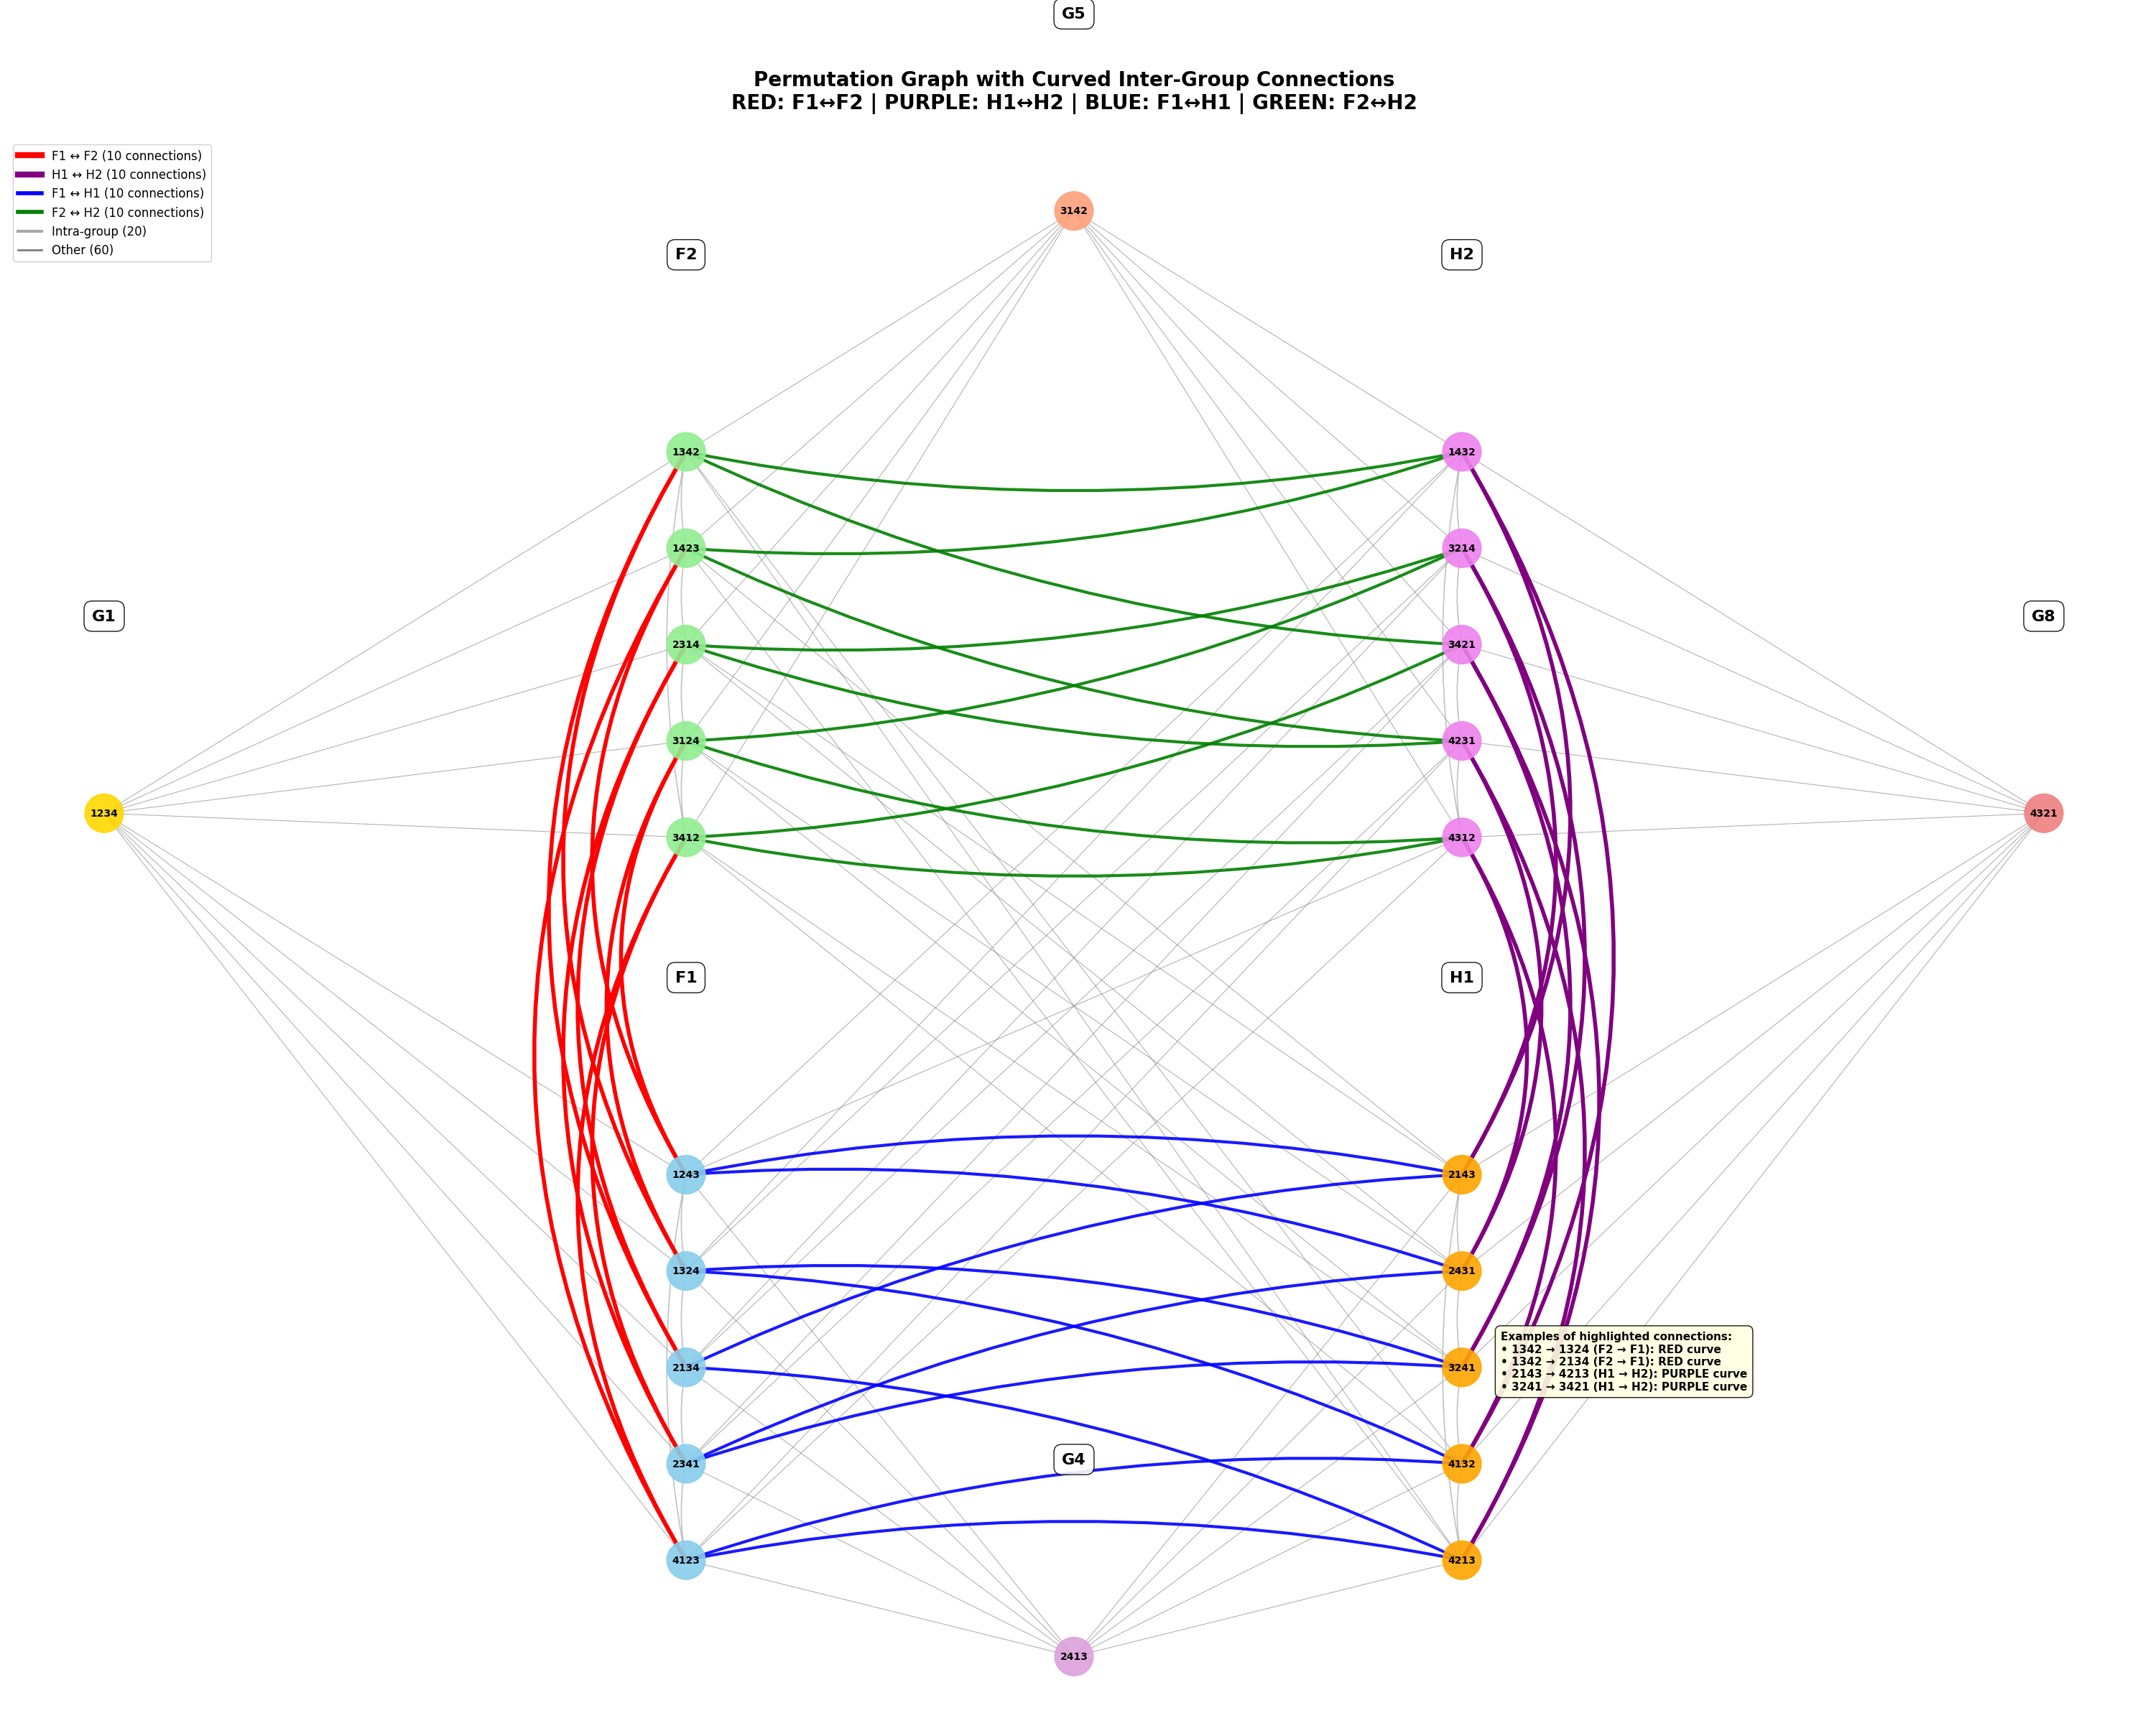


=== VERIFICATION OF SPECIFIC CONNECTIONS ===
✓ 1342 → 1324 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1342 → 2134 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1324 → 1342 (F1 → F2): CONFIRMED - will show as RED curve
✓ 2134 → 1342 (F1 → F2): CONFIRMED - will show as RED curve


In [31]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
import matplotlib.lines as mlines

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}

group_coords = {
    "G1": (0.5, 3), "F1": (2, 1.5), "F2": (2, 4.5),
    "G4": (3, -0.5), "G5": (3, 5.5),
    "H1": (4, 1.5), "H2": (4, 4.5),
    "G8": (5.5, 3)
}

group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Create node positions
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        node_positions[node] = (x, y - i * 0.4)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])

# Initialize edge lists
f1_to_h1, f2_to_h2, f1_to_f2, h1_to_h2, intra_group_edges, other_edges = [], [], [], [], [], []

def get_node_group(node):
    for group, nodes in group_nodes.items():
        if node in nodes:
            return group
    return None

# Classify all edges
for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        if not G.has_edge(node, neighbor):
            G.add_edge(node, neighbor)
            
            node_group = get_node_group(node)
            neighbor_group = get_node_group(neighbor)
            
            if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
                f1_to_h1.append((node, neighbor))
            elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
                f2_to_h2.append((node, neighbor))
            elif (node in f1 and neighbor in f2) or (node in f2 and neighbor in f1):
                f1_to_f2.append((node, neighbor))
            elif (node in h1 and neighbor in h2) or (node in h2 and neighbor in h1):
                h1_to_h2.append((node, neighbor))
            elif node_group == neighbor_group and node_group in ["F1", "F2", "H1", "H2"]:
                intra_group_edges.append((node, neighbor))
            else:
                other_edges.append((node, neighbor))

# Print analysis
print("EDGE ANALYSIS:")
print(f"F1 ↔ F2 connections: {len(f1_to_f2)}")
print(f"H1 ↔ H2 connections: {len(h1_to_h2)}")
print(f"F1 ↔ H1 connections: {len(f1_to_h1)}")
print(f"F2 ↔ H2 connections: {len(f2_to_h2)}")
print(f"Other + Intra-group connections: {len(other_edges + intra_group_edges)}")

# Create the visualization
fig, ax = plt.subplots(figsize=(30, 24))

# Draw nodes
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], 
                      node_size=1500, alpha=0.9, ax=ax)
nx.draw_networkx_labels(G, node_positions, font_size=10, font_weight='bold', ax=ax)

# Function to draw curved edges with FancyArrowPatch
def draw_curved_edges(edge_list, color, linewidth, curve_strength, alpha=1.0, label=""):
    for edge in edge_list:
        pos1 = node_positions[edge[0]]
        pos2 = node_positions[edge[1]]
        
        # Create curved connection
        arrow = FancyArrowPatch(pos1, pos2,
                               connectionstyle=f"arc3,rad={curve_strength}",
                               arrowstyle="-", 
                               color=color, 
                               linewidth=linewidth,
                               alpha=alpha)
        ax.add_patch(arrow)

# Draw background edges first (darker and more visible)
draw_curved_edges(other_edges, "gray", 0.8, 0, 0.6)
draw_curved_edges(intra_group_edges, "darkgray", 1.2, 0.1, 0.7)

# Draw main inter-group connections with strong curves and bright colors
# F1 ↔ F2 connections (RED, curved left)
draw_curved_edges(f1_to_f2, "red", 4, -0.3, 1.0, "F1↔F2")

# H1 ↔ H2 connections (PURPLE, curved right)  
draw_curved_edges(h1_to_h2, "purple", 4, 0.3, 1.0, "H1↔H2")

# F1 ↔ H1 connections (BLUE, slight curve)
draw_curved_edges(f1_to_h1, "blue", 3, -0.1, 0.9, "F1↔H1")

# F2 ↔ H2 connections (GREEN, slight curve)
draw_curved_edges(f2_to_h2, "green", 3, 0.1, 0.9, "F2↔H2")

# Add group labels with better visibility
for group, (x, y) in group_coords.items():
    ax.text(x, y + 0.8, group, fontsize=16, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9, edgecolor="black"))

# Create legend with thick, visible lines
legend_elements = [
    mlines.Line2D([], [], color='red', linewidth=6, label=f'F1 ↔ F2 ({len(f1_to_f2)} connections)'),
    mlines.Line2D([], [], color='purple', linewidth=6, label=f'H1 ↔ H2 ({len(h1_to_h2)} connections)'),
    mlines.Line2D([], [], color='blue', linewidth=4, label=f'F1 ↔ H1 ({len(f1_to_h1)} connections)'),
    mlines.Line2D([], [], color='green', linewidth=4, label=f'F2 ↔ H2 ({len(f2_to_h2)} connections)'),
    mlines.Line2D([], [], color='darkgray', linewidth=3, label=f'Intra-group ({len(intra_group_edges)})'),
    mlines.Line2D([], [], color='gray', linewidth=2, label=f'Other ({len(other_edges)})')
]

ax.set_title("Permutation Graph with Curved Inter-Group Connections\n" +
            "RED: F1↔F2 | PURPLE: H1↔H2 | BLUE: F1↔H1 | GREEN: F2↔H2", 
            fontsize=20, pad=30, fontweight='bold')
ax.axis("off")
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, 
          bbox_to_anchor=(0, 1), framealpha=0.9)

# Add highlighted connection examples
examples_text = f"""Examples of highlighted connections:
• 1342 → 1324 (F2 → F1): RED curve
• 1342 → 2134 (F2 → F1): RED curve  
• 2143 → 4213 (H1 → H2): PURPLE curve
• 3241 → 3421 (H1 → H2): PURPLE curve"""

ax.text(0.7, 0.25, examples_text, transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
        verticalalignment='top', fontweight='bold')

plt.tight_layout()
plt.show()

# Verify your specific examples
print(f"\n=== VERIFICATION OF SPECIFIC CONNECTIONS ===")
test_connections = [
    ("1342", "1324", "F2 → F1"),
    ("1342", "2134", "F2 → F1"),
    ("1324", "1342", "F1 → F2"),
    ("2134", "1342", "F1 → F2")
]

for node1, node2, description in test_connections:
    if G.has_edge(node1, node2):
        print(f"✓ {node1} → {node2} ({description}): CONFIRMED - will show as RED curve")
    else:
        print(f"✗ {node1} → {node2} ({description}): NOT FOUND")

EDGE ANALYSIS:
F1 ↔ F2 connections: 10
H1 ↔ H2 connections: 10
F1 ↔ H1 connections: 10
F2 ↔ H2 connections: 10
Other + Intra-group connections: 80
Graph saved as 'permutation_graph.pdf'
Graph also saved as 'permutation_graph.png'


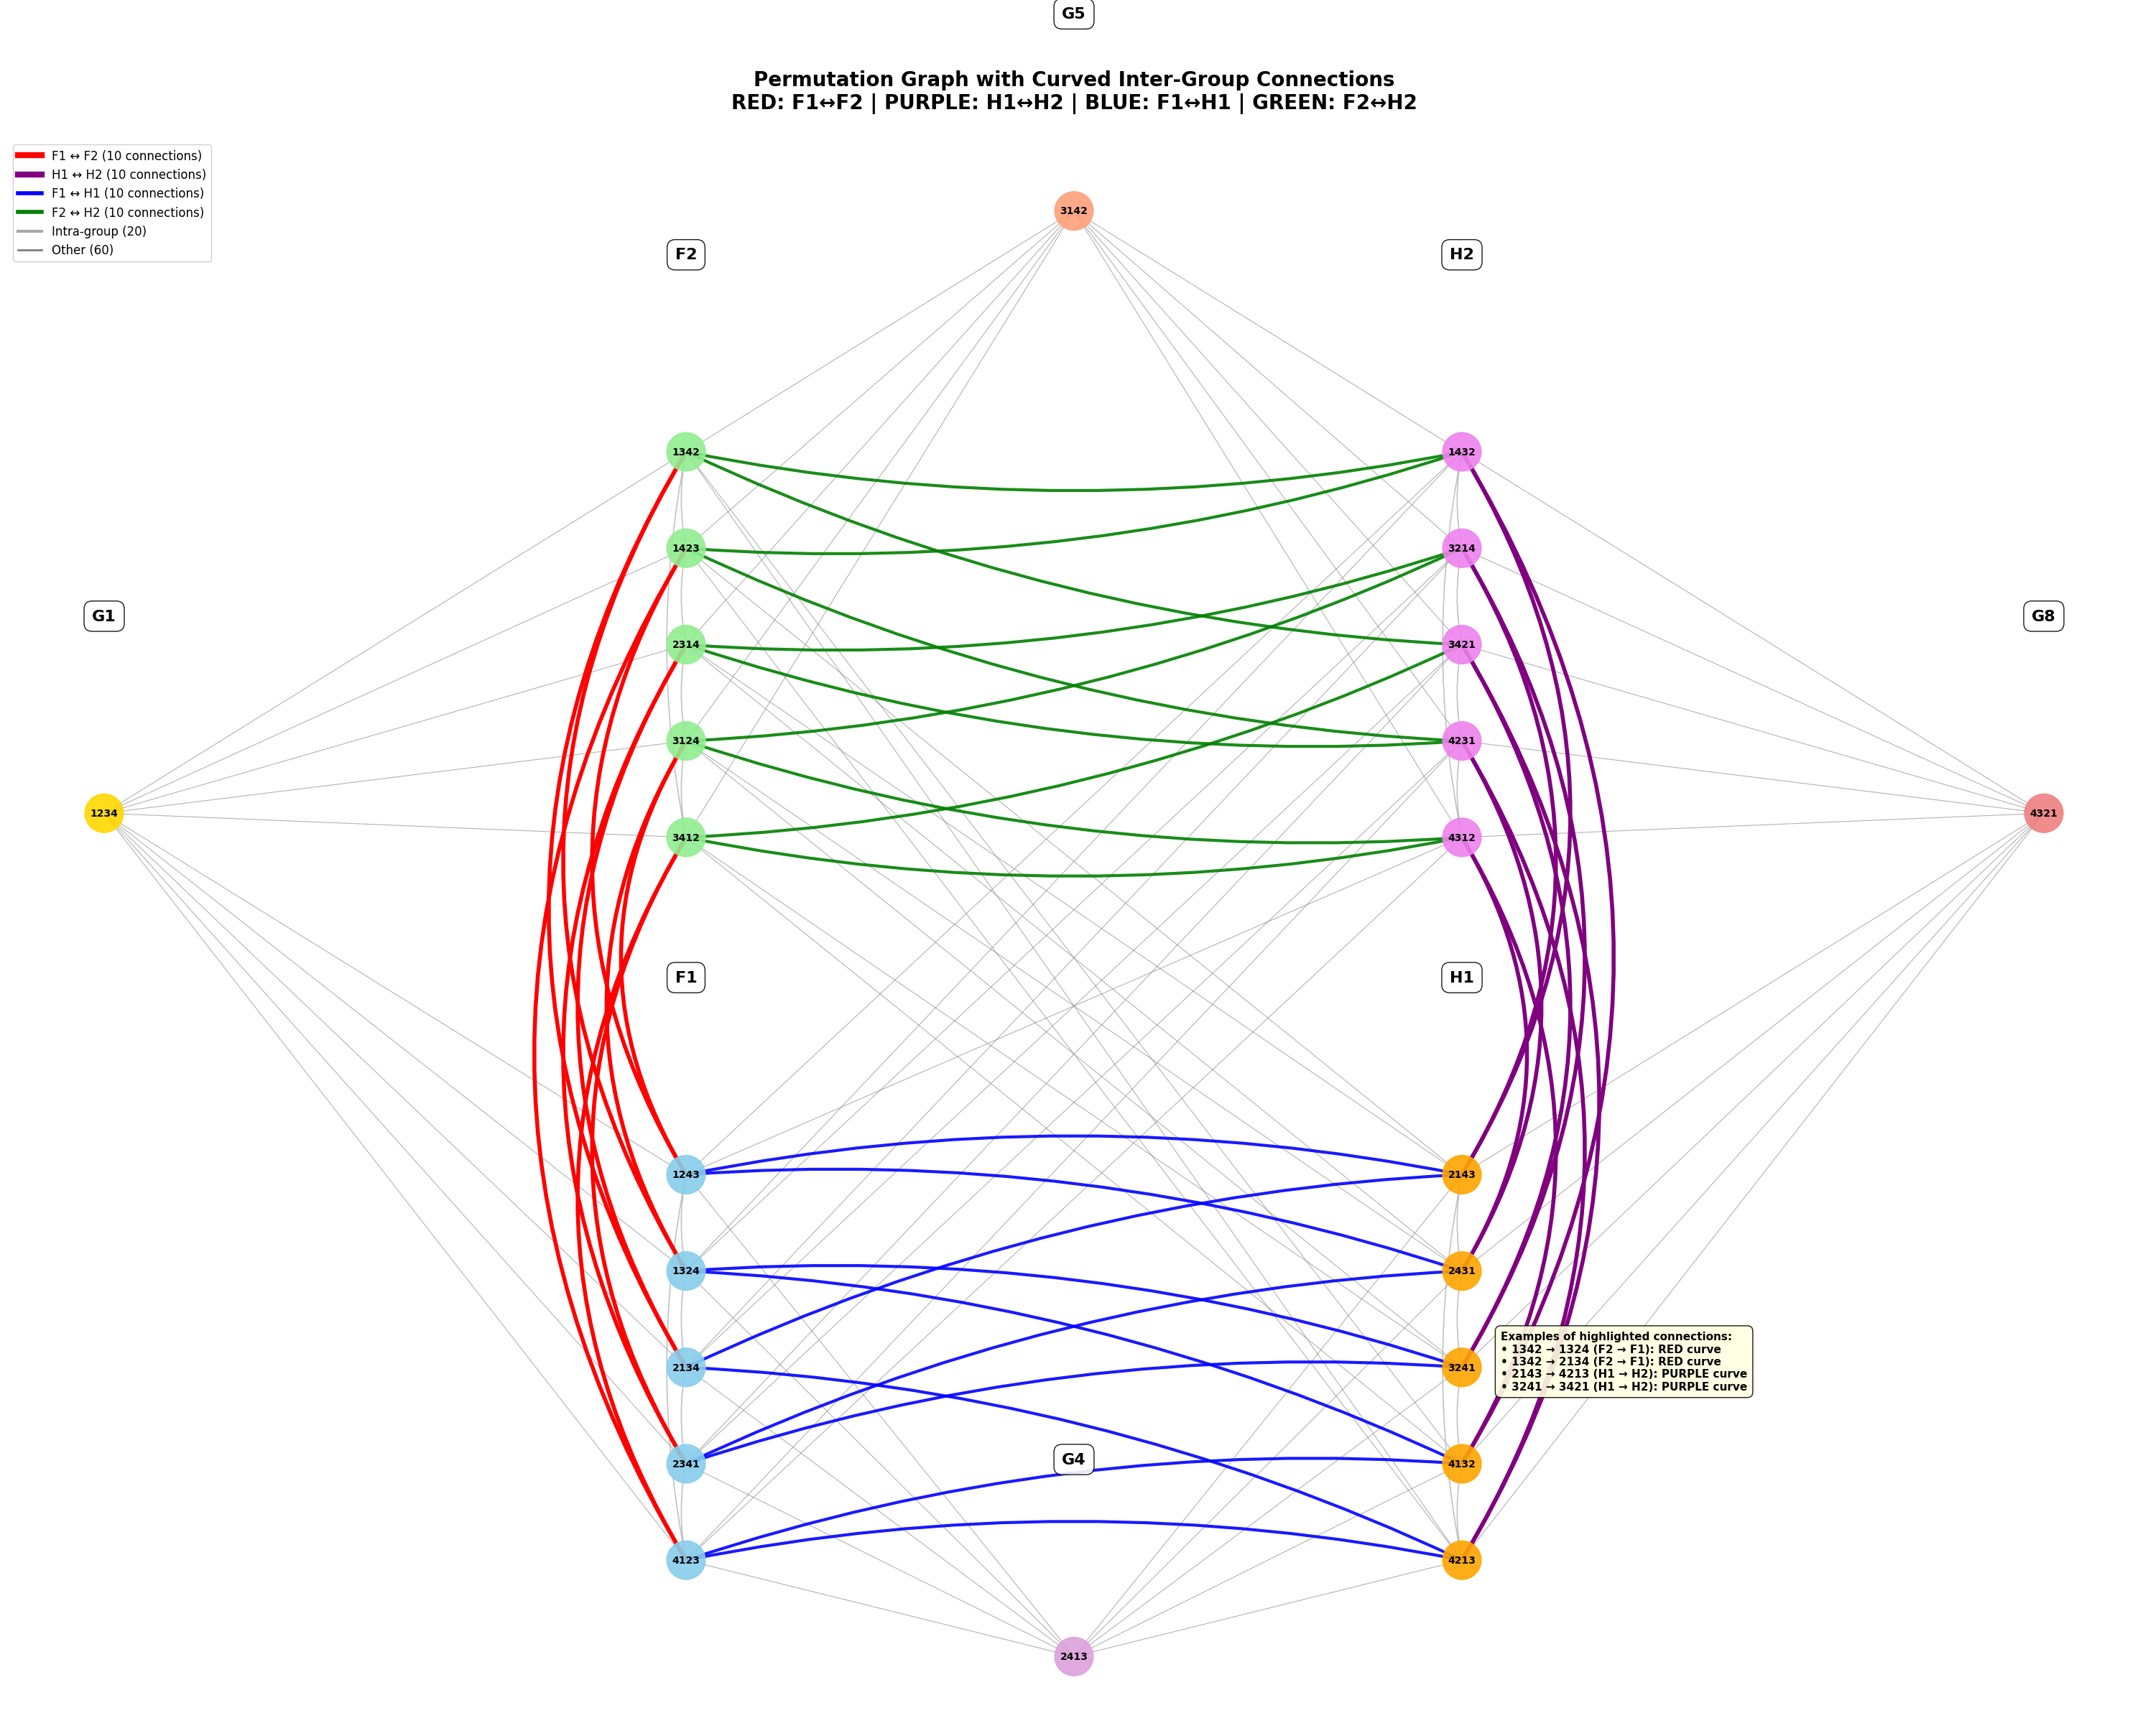


=== VERIFICATION OF SPECIFIC CONNECTIONS ===
✓ 1342 → 1324 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1342 → 2134 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1324 → 1342 (F1 → F2): CONFIRMED - will show as RED curve
✓ 2134 → 1342 (F1 → F2): CONFIRMED - will show as RED curve


In [32]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
import matplotlib.lines as mlines

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}

group_coords = {
    "G1": (0.5, 3), "F1": (2, 1.5), "F2": (2, 4.5),
    "G4": (3, -0.5), "G5": (3, 5.5),
    "H1": (4, 1.5), "H2": (4, 4.5),
    "G8": (5.5, 3)
}

group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Create node positions
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        node_positions[node] = (x, y - i * 0.4)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])

# Initialize edge lists
f1_to_h1, f2_to_h2, f1_to_f2, h1_to_h2, intra_group_edges, other_edges = [], [], [], [], [], []

def get_node_group(node):
    for group, nodes in group_nodes.items():
        if node in nodes:
            return group
    return None

# Classify all edges
for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        if not G.has_edge(node, neighbor):
            G.add_edge(node, neighbor)
            
            node_group = get_node_group(node)
            neighbor_group = get_node_group(neighbor)
            
            if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
                f1_to_h1.append((node, neighbor))
            elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
                f2_to_h2.append((node, neighbor))
            elif (node in f1 and neighbor in f2) or (node in f2 and neighbor in f1):
                f1_to_f2.append((node, neighbor))
            elif (node in h1 and neighbor in h2) or (node in h2 and neighbor in h1):
                h1_to_h2.append((node, neighbor))
            elif node_group == neighbor_group and node_group in ["F1", "F2", "H1", "H2"]:
                intra_group_edges.append((node, neighbor))
            else:
                other_edges.append((node, neighbor))

# Print analysis
print("EDGE ANALYSIS:")
print(f"F1 ↔ F2 connections: {len(f1_to_f2)}")
print(f"H1 ↔ H2 connections: {len(h1_to_h2)}")
print(f"F1 ↔ H1 connections: {len(f1_to_h1)}")
print(f"F2 ↔ H2 connections: {len(f2_to_h2)}")
print(f"Other + Intra-group connections: {len(other_edges + intra_group_edges)}")

# Create the visualization
fig, ax = plt.subplots(figsize=(30, 24))

# Draw nodes
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], 
                      node_size=1500, alpha=0.9, ax=ax)
nx.draw_networkx_labels(G, node_positions, font_size=10, font_weight='bold', ax=ax)

# Function to draw curved edges with FancyArrowPatch
def draw_curved_edges(edge_list, color, linewidth, curve_strength, alpha=1.0, label=""):
    for edge in edge_list:
        pos1 = node_positions[edge[0]]
        pos2 = node_positions[edge[1]]
        
        # Create curved connection
        arrow = FancyArrowPatch(pos1, pos2,
                               connectionstyle=f"arc3,rad={curve_strength}",
                               arrowstyle="-", 
                               color=color, 
                               linewidth=linewidth,
                               alpha=alpha)
        ax.add_patch(arrow)

# Draw background edges first (darker and more visible)
draw_curved_edges(other_edges, "gray", 0.8, 0, 0.6)
draw_curved_edges(intra_group_edges, "darkgray", 1.2, 0.1, 0.7)

# Draw main inter-group connections with strong curves and bright colors
# F1 ↔ F2 connections (RED, curved left)
draw_curved_edges(f1_to_f2, "red", 4, -0.3, 1.0, "F1↔F2")

# H1 ↔ H2 connections (PURPLE, curved right)  
draw_curved_edges(h1_to_h2, "purple", 4, 0.3, 1.0, "H1↔H2")

# F1 ↔ H1 connections (BLUE, slight curve)
draw_curved_edges(f1_to_h1, "blue", 3, -0.1, 0.9, "F1↔H1")

# F2 ↔ H2 connections (GREEN, slight curve)
draw_curved_edges(f2_to_h2, "green", 3, 0.1, 0.9, "F2↔H2")

# Add group labels with better visibility
for group, (x, y) in group_coords.items():
    ax.text(x, y + 0.8, group, fontsize=16, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9, edgecolor="black"))

# Create legend with thick, visible lines
legend_elements = [
    mlines.Line2D([], [], color='red', linewidth=6, label=f'F1 ↔ F2 ({len(f1_to_f2)} connections)'),
    mlines.Line2D([], [], color='purple', linewidth=6, label=f'H1 ↔ H2 ({len(h1_to_h2)} connections)'),
    mlines.Line2D([], [], color='blue', linewidth=4, label=f'F1 ↔ H1 ({len(f1_to_h1)} connections)'),
    mlines.Line2D([], [], color='green', linewidth=4, label=f'F2 ↔ H2 ({len(f2_to_h2)} connections)'),
    mlines.Line2D([], [], color='darkgray', linewidth=3, label=f'Intra-group ({len(intra_group_edges)})'),
    mlines.Line2D([], [], color='gray', linewidth=2, label=f'Other ({len(other_edges)})')
]

ax.set_title("Permutation Graph with Curved Inter-Group Connections\n" +
            "RED: F1↔F2 | PURPLE: H1↔H2 | BLUE: F1↔H1 | GREEN: F2↔H2", 
            fontsize=20, pad=30, fontweight='bold')
ax.axis("off")
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, 
          bbox_to_anchor=(0, 1), framealpha=0.9)

# Add highlighted connection examples
examples_text = f"""Examples of highlighted connections:
• 1342 → 1324 (F2 → F1): RED curve
• 1342 → 2134 (F2 → F1): RED curve  
• 2143 → 4213 (H1 → H2): PURPLE curve
• 3241 → 3421 (H1 → H2): PURPLE curve"""

ax.text(0.7, 0.25, examples_text, transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
        verticalalignment='top', fontweight='bold')

plt.tight_layout()

# Save as PDF
plt.savefig('permutation_graph.pdf', format='pdf', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Graph saved as 'permutation_graph.pdf'")

# Also save as high-resolution PNG as backup
plt.savefig('permutation_graph.png', format='png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Graph also saved as 'permutation_graph.png'")

plt.show()

# Verify your specific examples
print(f"\n=== VERIFICATION OF SPECIFIC CONNECTIONS ===")
test_connections = [
    ("1342", "1324", "F2 → F1"),
    ("1342", "2134", "F2 → F1"),
    ("1324", "1342", "F1 → F2"),
    ("2134", "1342", "F1 → F2")
]

for node1, node2, description in test_connections:
    if G.has_edge(node1, node2):
        print(f"✓ {node1} → {node2} ({description}): CONFIRMED - will show as RED curve")
    else:
        print(f"✗ {node1} → {node2} ({description}): NOT FOUND")

EDGE ANALYSIS:
F1 ↔ F2 connections: 10
H1 ↔ H2 connections: 10
F1 ↔ H1 connections: 10
F2 ↔ H2 connections: 10
Other + Intra-group connections: 80
Graph saved as 'permutation_graph.svg'
Graph saved as 'permutation_graph.pdf'


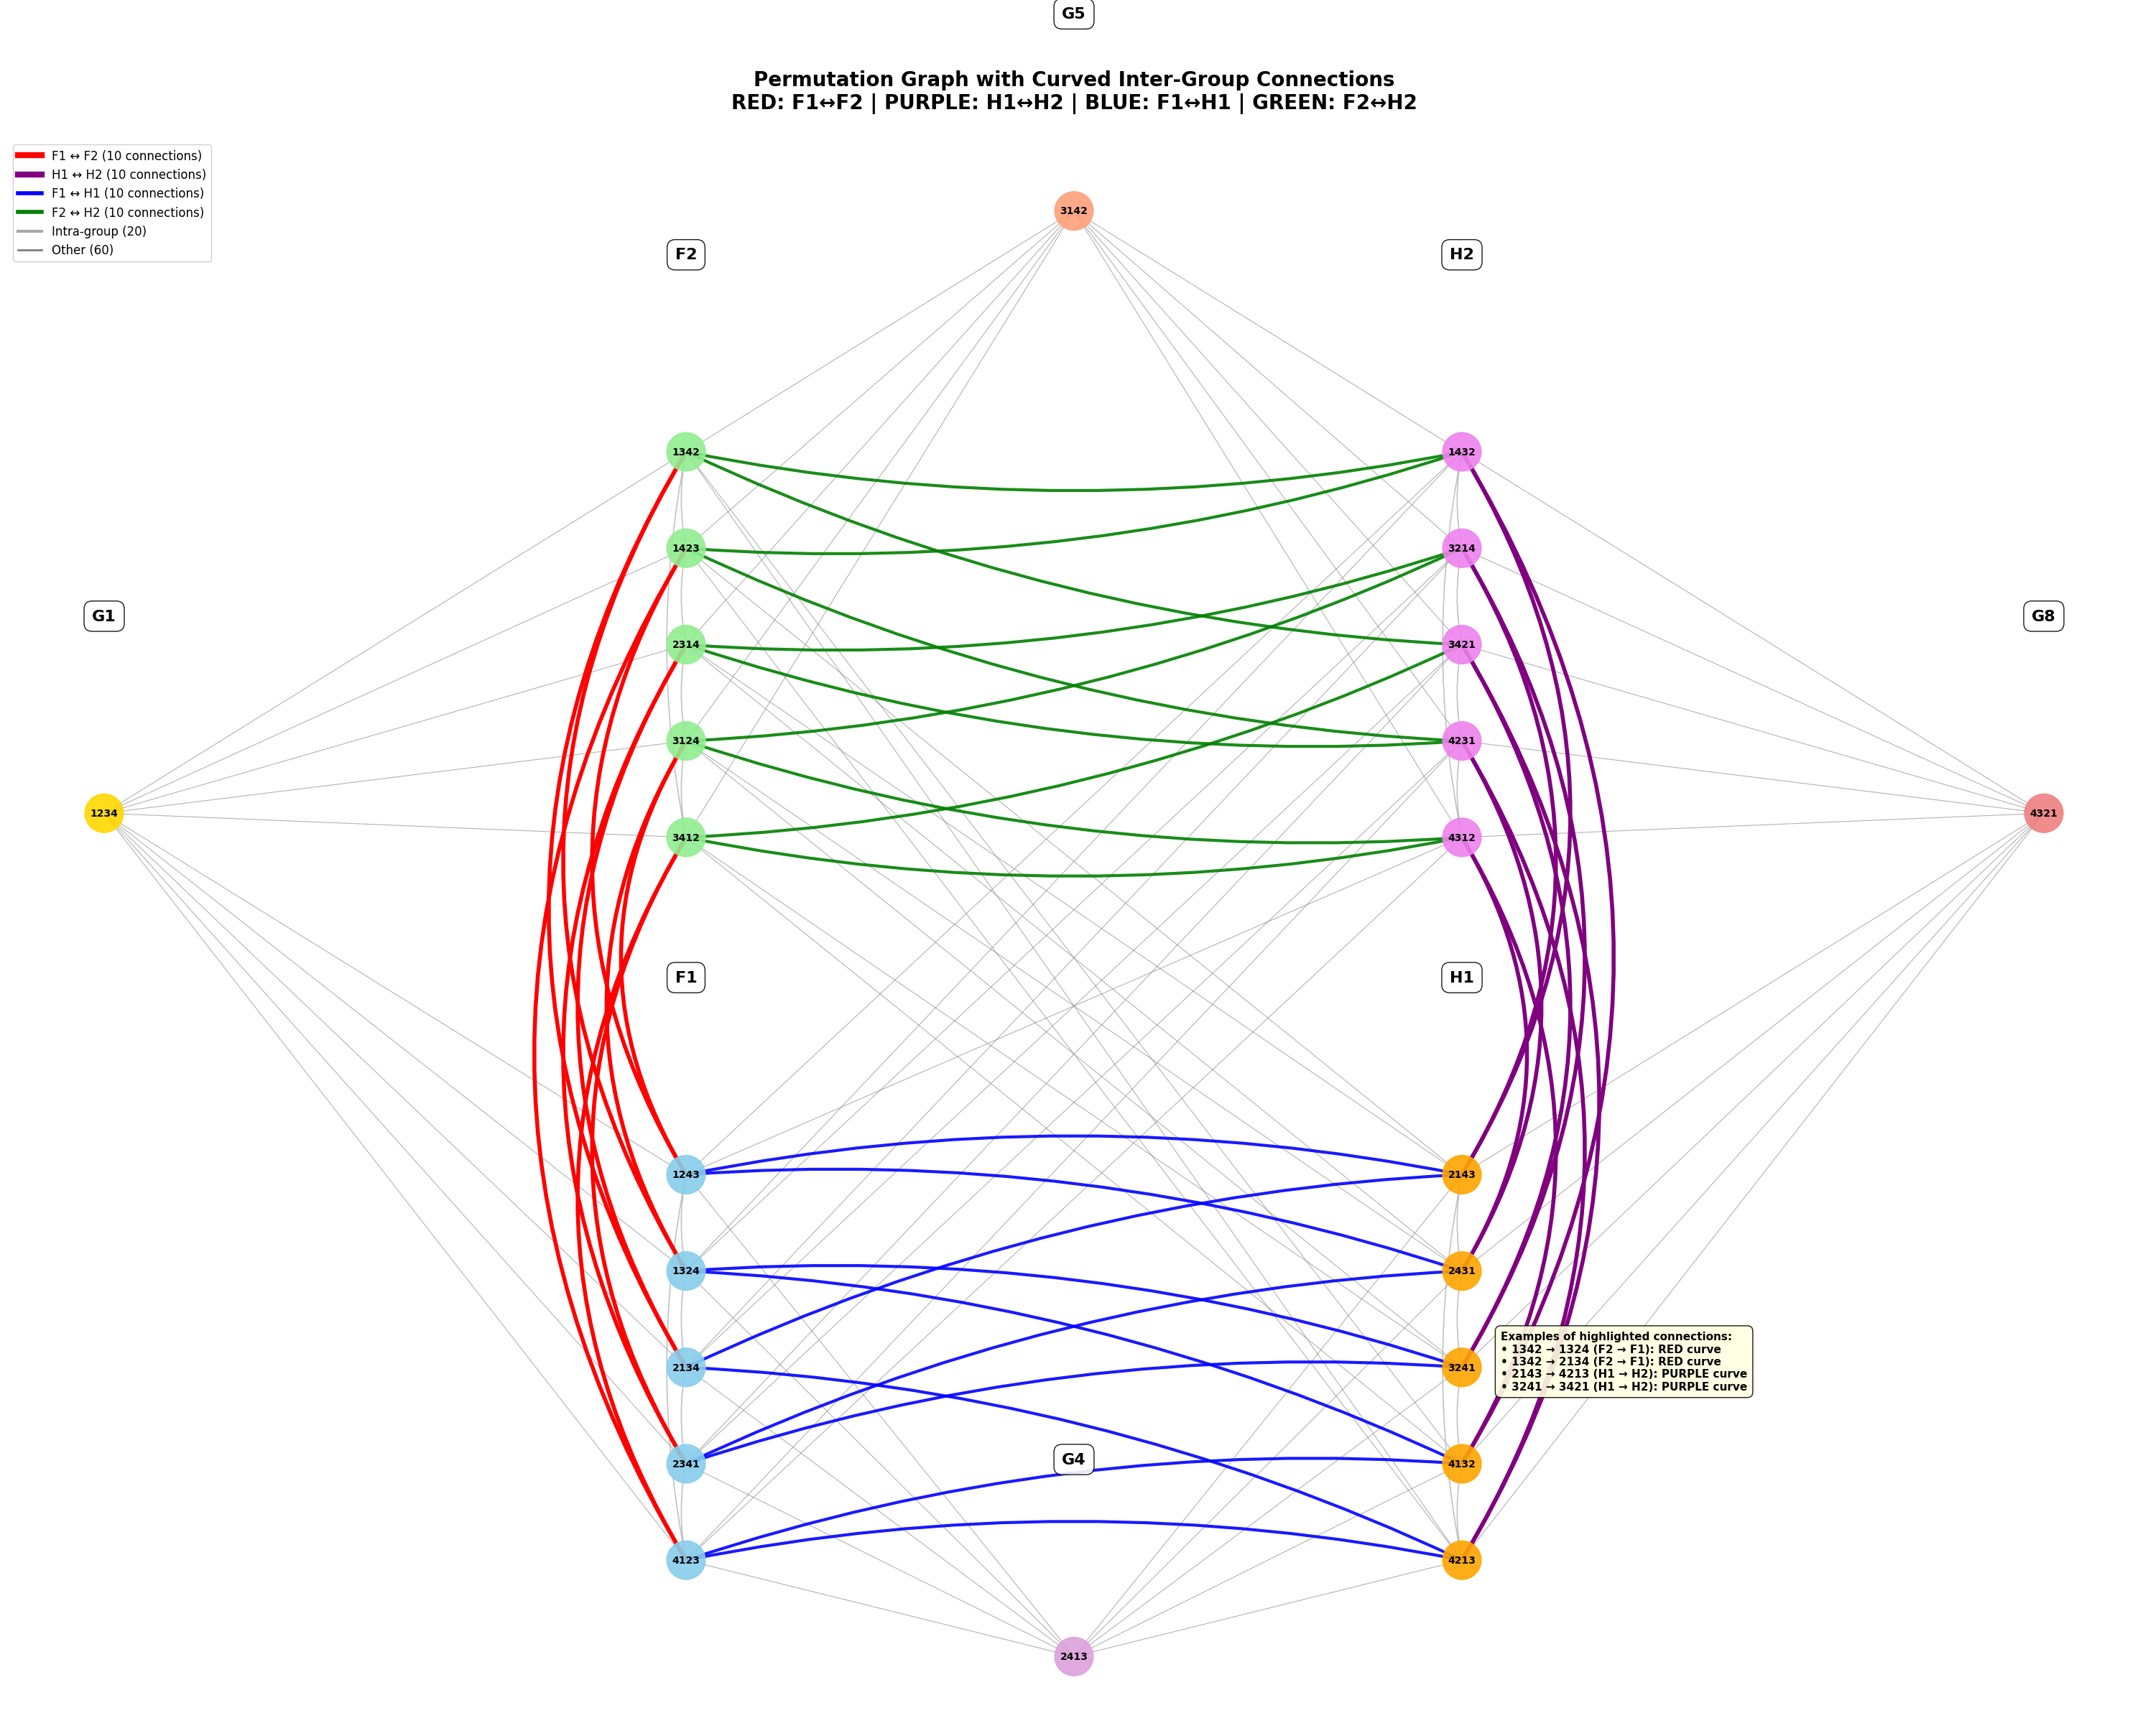

Graph saved as 'permutation_graph.ipe'

=== VERIFICATION OF SPECIFIC CONNECTIONS ===
✓ 1342 → 1324 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1342 → 2134 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1324 → 1342 (F1 → F2): CONFIRMED - will show as RED curve
✓ 2134 → 1342 (F1 → F2): CONFIRMED - will show as RED curve


In [36]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
import matplotlib.lines as mlines

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}

group_coords = {
    "G1": (0.5, 3), "F1": (2, 1.5), "F2": (2, 4.5),
    "G4": (3, -0.5), "G5": (3, 5.5),
    "H1": (4, 1.5), "H2": (4, 4.5),
    "G8": (5.5, 3)
}

group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Create node positions
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        node_positions[node] = (x, y - i * 0.4)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])

# Initialize edge lists
f1_to_h1, f2_to_h2, f1_to_f2, h1_to_h2, intra_group_edges, other_edges = [], [], [], [], [], []

def get_node_group(node):
    for group, nodes in group_nodes.items():
        if node in nodes:
            return group
    return None

# Classify all edges
for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        if not G.has_edge(node, neighbor):
            G.add_edge(node, neighbor)
            
            node_group = get_node_group(node)
            neighbor_group = get_node_group(neighbor)
            
            if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
                f1_to_h1.append((node, neighbor))
            elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
                f2_to_h2.append((node, neighbor))
            elif (node in f1 and neighbor in f2) or (node in f2 and neighbor in f1):
                f1_to_f2.append((node, neighbor))
            elif (node in h1 and neighbor in h2) or (node in h2 and neighbor in h1):
                h1_to_h2.append((node, neighbor))
            elif node_group == neighbor_group and node_group in ["F1", "F2", "H1", "H2"]:
                intra_group_edges.append((node, neighbor))
            else:
                other_edges.append((node, neighbor))

# Print analysis
print("EDGE ANALYSIS:")
print(f"F1 ↔ F2 connections: {len(f1_to_f2)}")
print(f"H1 ↔ H2 connections: {len(h1_to_h2)}")
print(f"F1 ↔ H1 connections: {len(f1_to_h1)}")
print(f"F2 ↔ H2 connections: {len(f2_to_h2)}")
print(f"Other + Intra-group connections: {len(other_edges + intra_group_edges)}")

# Create the visualization
fig, ax = plt.subplots(figsize=(30, 24))

# Draw nodes
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], 
                      node_size=1500, alpha=0.9, ax=ax)
nx.draw_networkx_labels(G, node_positions, font_size=10, font_weight='bold', ax=ax)

# Function to draw curved edges with FancyArrowPatch
def draw_curved_edges(edge_list, color, linewidth, curve_strength, alpha=1.0, label=""):
    for edge in edge_list:
        pos1 = node_positions[edge[0]]
        pos2 = node_positions[edge[1]]
        
        # Create curved connection
        arrow = FancyArrowPatch(pos1, pos2,
                               connectionstyle=f"arc3,rad={curve_strength}",
                               arrowstyle="-", 
                               color=color, 
                               linewidth=linewidth,
                               alpha=alpha)
        ax.add_patch(arrow)

# Draw background edges first (darker and more visible)
draw_curved_edges(other_edges, "gray", 0.8, 0, 0.6)
draw_curved_edges(intra_group_edges, "darkgray", 1.2, 0.1, 0.7)

# Draw main inter-group connections with strong curves and bright colors
# F1 ↔ F2 connections (RED, curved left)
draw_curved_edges(f1_to_f2, "red", 4, -0.3, 1.0, "F1↔F2")

# H1 ↔ H2 connections (PURPLE, curved right)  
draw_curved_edges(h1_to_h2, "purple", 4, 0.3, 1.0, "H1↔H2")

# F1 ↔ H1 connections (BLUE, slight curve)
draw_curved_edges(f1_to_h1, "blue", 3, -0.1, 0.9, "F1↔H1")

# F2 ↔ H2 connections (GREEN, slight curve)
draw_curved_edges(f2_to_h2, "green", 3, 0.1, 0.9, "F2↔H2")

# Add group labels with better visibility
for group, (x, y) in group_coords.items():
    ax.text(x, y + 0.8, group, fontsize=16, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9, edgecolor="black"))

# Create legend with thick, visible lines
legend_elements = [
    mlines.Line2D([], [], color='red', linewidth=6, label=f'F1 ↔ F2 ({len(f1_to_f2)} connections)'),
    mlines.Line2D([], [], color='purple', linewidth=6, label=f'H1 ↔ H2 ({len(h1_to_h2)} connections)'),
    mlines.Line2D([], [], color='blue', linewidth=4, label=f'F1 ↔ H1 ({len(f1_to_h1)} connections)'),
    mlines.Line2D([], [], color='green', linewidth=4, label=f'F2 ↔ H2 ({len(f2_to_h2)} connections)'),
    mlines.Line2D([], [], color='darkgray', linewidth=3, label=f'Intra-group ({len(intra_group_edges)})'),
    mlines.Line2D([], [], color='gray', linewidth=2, label=f'Other ({len(other_edges)})')
]

ax.set_title("Permutation Graph with Curved Inter-Group Connections\n" +
            "RED: F1↔F2 | PURPLE: H1↔H2 | BLUE: F1↔H1 | GREEN: F2↔H2", 
            fontsize=20, pad=30, fontweight='bold')
ax.axis("off")
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, 
          bbox_to_anchor=(0, 1), framealpha=0.9)

# Add highlighted connection examples
examples_text = f"""Examples of highlighted connections:
• 1342 → 1324 (F2 → F1): RED curve
• 1342 → 2134 (F2 → F1): RED curve  
• 2143 → 4213 (H1 → H2): PURPLE curve
• 3241 → 3421 (H1 → H2): PURPLE curve"""

ax.text(0.7, 0.25, examples_text, transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
        verticalalignment='top', fontweight='bold')

plt.tight_layout()

# Save as SVG (vector format)
plt.savefig('permutation_graph.svg', format='svg', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Graph saved as 'permutation_graph.svg'")

# Save as PDF as well
plt.savefig('permutation_graph.pdf', format='pdf', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Graph saved as 'permutation_graph.pdf'")

plt.show()

# Create IPE file
def create_ipe_file():
    """Create an IPE XML file with the graph"""
    
    # IPE XML header - using raw string to avoid unicode escape issues
    ipe_content = r'''<?xml version="1.0"?>
<!DOCTYPE ipe SYSTEM "ipe.dtd">
<ipe version="70218" creator="Python script">
<info created="D:20250131000000" modified="D:20250131000000"/>
<preamble>\usepackage{amsmath}
\usepackage{amssymb}</preamble>
<ipestyle name="basic">
<symbol name="arrow/arc(spx)">
<path stroke="sym-stroke" fill="sym-stroke" pen="sym-pen">
0 0 m
-1.0 0.333 l
-1.0 -0.333 l
h
</path>
</symbol>
<pen name="heavier" value="0.8"/>
<pen name="fat" value="1.2"/>
<pen name="ultrafat" value="2"/>
</ipestyle>
<page>
'''
    
    # Scale factor for IPE coordinates (IPE uses PostScript points)
    scale = 50
    
    # Add nodes to IPE
    for node, (x, y) in node_positions.items():
        color = node_colors[node]
        # Convert matplotlib colors to IPE colors
        ipe_color = {
            'gold': '1 1 0', 'skyblue': '0.5 0.8 1', 'lightgreen': '0.7 1 0.7',
            'plum': '0.9 0.7 0.9', 'lightsalmon': '1 0.6 0.5',
            'orange': '1 0.65 0', 'violet': '0.9 0.5 0.9', 'lightcoral': '1 0.5 0.5'
        }.get(color, '0.8 0.8 0.8')
        
        ipe_x, ipe_y = x * scale + 200, y * scale + 300
        
        # Add circle for node
        ipe_content += f'<use name="mark/circle(sx)" pos="{ipe_x} {ipe_y}" size="large" stroke="black" fill="{ipe_color}"/>\n'
        
        # Add text label
        ipe_content += f'<text transformations="translations" pos="{ipe_x} {ipe_y}" stroke="black" type="label" width="20" height="8" depth="2" halign="center" valign="center">{node}</text>\n'
    
    # Add edges to IPE
    def add_ipe_edges(edge_list, color, width, curve_offset=0):
        nonlocal ipe_content
        for edge in edge_list:
            x1, y1 = node_positions[edge[0]]
            x2, y2 = node_positions[edge[1]]
            
            ipe_x1, ipe_y1 = x1 * scale + 200, y1 * scale + 300
            ipe_x2, ipe_y2 = x2 * scale + 200, y2 * scale + 300
            
            if curve_offset == 0:
                # Straight line
                ipe_content += f'<path stroke="{color}" pen="{width}">\n'
                ipe_content += f'{ipe_x1} {ipe_y1} m\n'
                ipe_content += f'{ipe_x2} {ipe_y2} l\n'
                ipe_content += '</path>\n'
            else:
                # Curved line - create bezier curve
                mid_x = (ipe_x1 + ipe_x2) / 2
                mid_y = (ipe_y1 + ipe_y2) / 2
                
                # Calculate perpendicular offset for curve
                dx = ipe_x2 - ipe_x1
                dy = ipe_y2 - ipe_y1
                length = (dx*dx + dy*dy)**0.5
                if length > 0:
                    perp_x = -dy / length * curve_offset * scale
                    perp_y = dx / length * curve_offset * scale
                    
                    control_x = mid_x + perp_x
                    control_y = mid_y + perp_y
                    
                    ipe_content += f'<path stroke="{color}" pen="{width}">\n'
                    ipe_content += f'{ipe_x1} {ipe_y1} m\n'
                    ipe_content += f'{control_x} {control_y} {ipe_x2} {ipe_y2} c\n'
                    ipe_content += '</path>\n'
    
    # Add edges in order (background to foreground)
    add_ipe_edges(other_edges, "0.5 0.5 0.5", "normal", 0)  # Gray
    add_ipe_edges(intra_group_edges, "0.3 0.3 0.3", "heavier", 0.1)  # Dark gray
    add_ipe_edges(f1_to_h1, "0 0 1", "fat", -0.1)  # Blue
    add_ipe_edges(f2_to_h2, "0 0.8 0", "fat", 0.1)  # Green
    add_ipe_edges(f1_to_f2, "1 0 0", "ultrafat", -0.3)  # Red
    add_ipe_edges(h1_to_h2, "0.5 0 0.5", "ultrafat", 0.3)  # Purple
    
    # Add group labels
    for group, (x, y) in group_coords.items():
        ipe_x, ipe_y = x * scale + 200, (y + 0.8) * scale + 300
        ipe_content += f'<text transformations="translations" pos="{ipe_x} {ipe_y}" stroke="black" type="label" width="20" height="12" depth="0" halign="center" valign="baseline" style="math">{group}</text>\n'
    
    # Add title
    ipe_content += f'<text transformations="translations" pos="300 550" stroke="black" type="label" width="400" height="20" depth="5" halign="center" valign="baseline" size="large">Permutation Graph with Inter-Group Connections</text>\n'
    
    # IPE XML footer
    ipe_content += '''</page>
</ipe>'''
    
    # Write to file
    with open('permutation_graph.ipe', 'w') as f:
        f.write(ipe_content)
    
    print("Graph saved as 'permutation_graph.ipe'")

# Create the IPE file
create_ipe_file()

# Verify your specific examples
print(f"\n=== VERIFICATION OF SPECIFIC CONNECTIONS ===")
test_connections = [
    ("1342", "1324", "F2 → F1"),
    ("1342", "2134", "F2 → F1"),
    ("1324", "1342", "F1 → F2"),
    ("2134", "1342", "F1 → F2")
]

for node1, node2, description in test_connections:
    if G.has_edge(node1, node2):
        print(f"✓ {node1} → {node2} ({description}): CONFIRMED - will show as RED curve")
    else:
        print(f"✗ {node1} → {node2} ({description}): NOT FOUND")

EDGE ANALYSIS:
F1 ↔ F2 connections: 10
H1 ↔ H2 connections: 10
F1 ↔ H1 connections: 10
F2 ↔ H2 connections: 10
Other + Intra-group connections: 80
Graph saved as 'permutation_graph.svg'
Graph saved as 'permutation_graph.pdf'


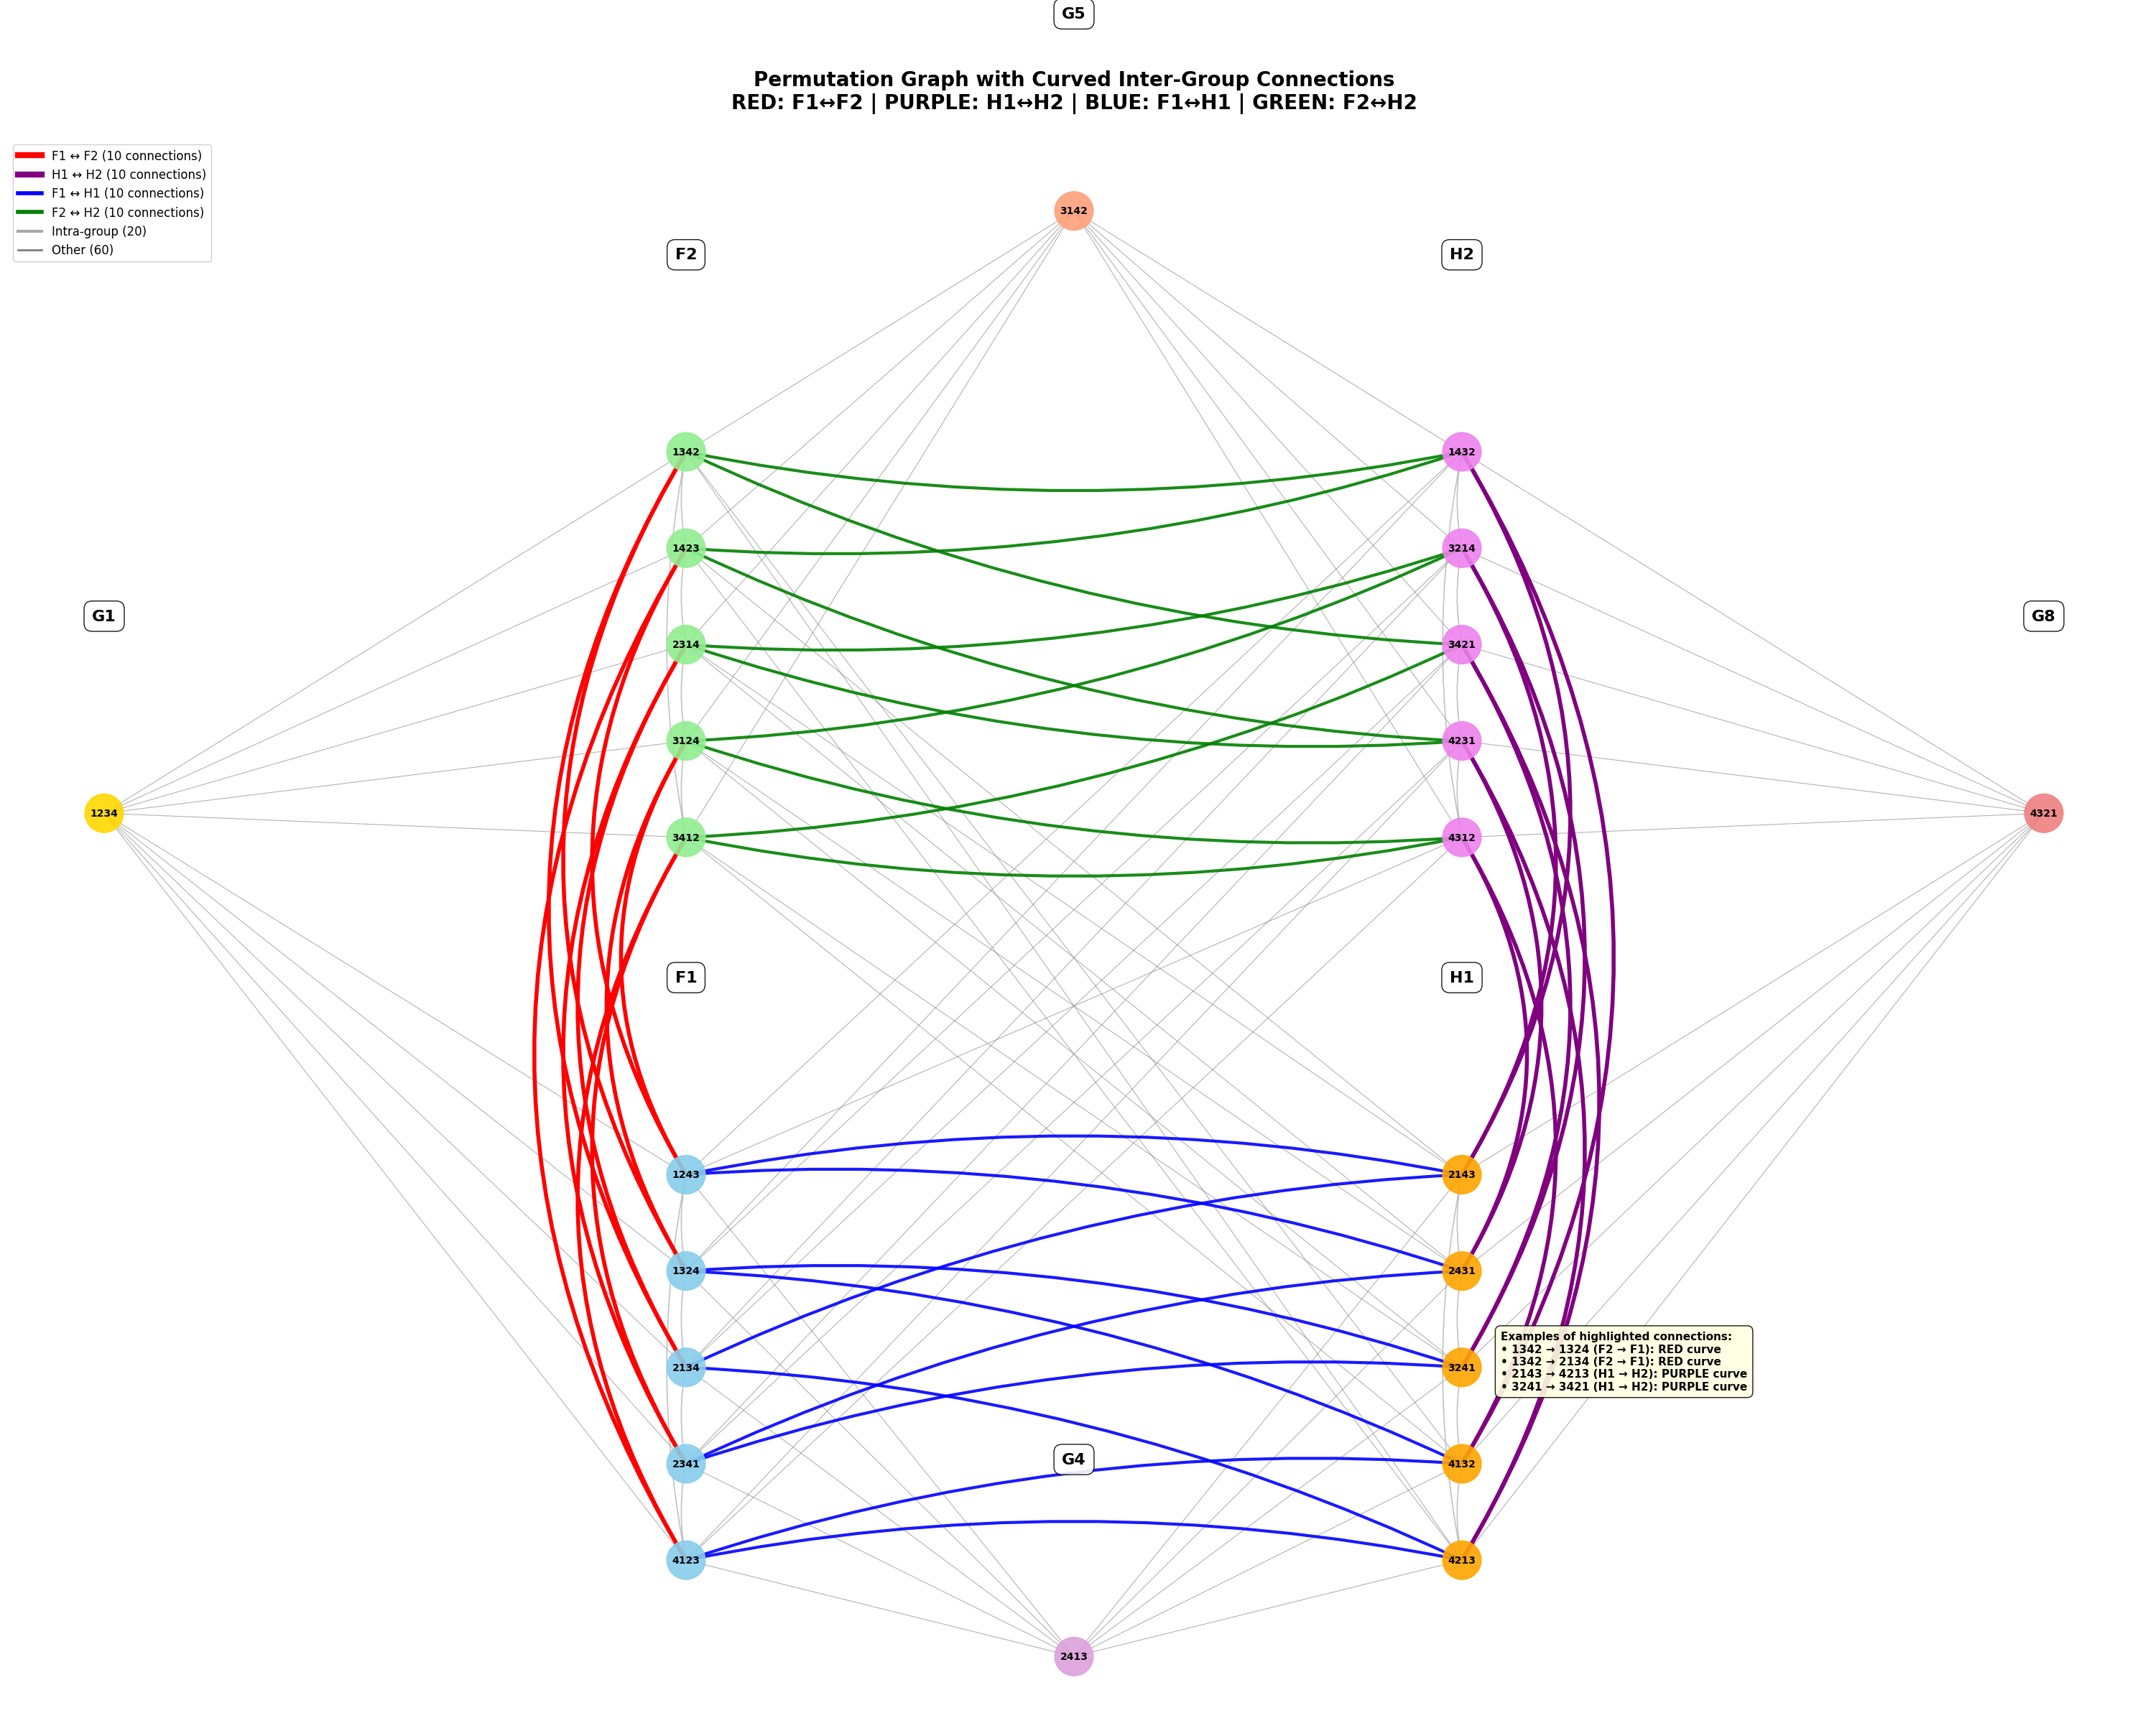

Graph saved as 'permutation_graph.ipe' with improved formatting

=== VERIFICATION OF SPECIFIC CONNECTIONS ===
✓ 1342 → 1324 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1342 → 2134 (F2 → F1): CONFIRMED - will show as RED curve
✓ 1324 → 1342 (F1 → F2): CONFIRMED - will show as RED curve
✓ 2134 → 1342 (F1 → F2): CONFIRMED - will show as RED curve


In [35]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
import matplotlib.lines as mlines

# RTF-based edge dictionary
edge_dict = {
    "1243": ["2143", "2431", "1432", "4312", "1324", "4123", "1423", "3124", "2413", "1234"],
    "1324": ["3241", "4132", "1432", "3214", "1243", "2134", "1342", "3124", "2413", "1234"],
    "2134": ["2143", "4213", "3214", "3421", "1324", "2341", "1342", "2314", "2413", "1234"],
    "2341": ["2431", "3241", "3421", "4231", "2134", "4123", "2314", "3412", "2413", "1234"],
    "4123": ["4132", "4213", "4231", "4312", "1243", "2341", "1423", "3412", "2413", "1234"],
    "1342": ["4132", "4213", "1432", "3421", "1324", "2134", "1423", "3412", "3142", "1234"],
    "1423": ["2143", "4213", "1432", "4231", "1243", "4123", "1342", "2314", "3142", "1234"],
    "2314": ["2143", "2431", "3214", "4231", "2134", "2341", "1423", "3124", "3142", "1234"],
    "3124": ["2431", "3241", "3214", "4312", "1243", "1324", "2314", "3412", "3142", "1234"],
    "3412": ["3241", "4132", "3421", "4312", "2341", "4123", "1342", "3124", "3142", "1234"],
    "2143": ["1243", "2134", "1423", "2314", "2431", "4213", "1432", "3214", "2413", "4321"],
    "2431": ["1243", "2341", "2314", "3124", "2143", "3241", "4231", "4312", "2413", "4321"],
    "3241": ["1324", "2341", "3124", "3412", "2431", "4132", "3214", "3421", "2413", "4321"],
    "4132": ["1324", "4123", "1342", "3412", "3241", "4213", "1432", "4312", "2413", "4321"],
    "4213": ["2134", "4123", "1342", "1423", "2143", "4132", "3421", "4231", "2413", "4321"],
    "1432": ["1243", "1324", "1342", "1423", "2143", "4132", "3214", "4312", "3142", "4321"],
    "3214": ["1324", "2134", "2314", "3124", "2143", "3241", "1432", "3421", "3142", "4321"],
    "3421": ["2134", "2341", "1342", "3412", "3241", "4213", "3214", "4231", "3142", "4321"],
    "4231": ["2341", "4123", "1423", "2314", "2431", "4213", "3421", "4312", "3142", "4321"],
    "4312": ["1243", "4123", "3124", "3412", "2431", "4132", "1432", "4231", "3142", "4321"]
}

# Groups and positions
group_nodes = {
    "F1": ["1243", "1324", "2134", "2341", "4123"],
    "F2": ["1342", "1423", "2314", "3124", "3412"],
    "H1": ["2143", "2431", "3241", "4132", "4213"],
    "H2": ["1432", "3214", "3421", "4231", "4312"],
    "G1": ["1234"],
    "G4": ["2413"],
    "G5": ["3142"],
    "G8": ["4321"]
}

group_coords = {
    "G1": (0.5, 3), "F1": (2, 1.5), "F2": (2, 4.5),
    "G4": (3, -0.5), "G5": (3, 5.5),
    "H1": (4, 1.5), "H2": (4, 4.5),
    "G8": (5.5, 3)
}

group_colors = {
    "G1": "gold", "F1": "skyblue", "F2": "lightgreen",
    "G4": "plum", "G5": "lightsalmon",
    "H1": "orange", "H2": "violet",
    "G8": "lightcoral"
}

# Create node positions
node_positions = {}
node_colors = {}
for group, nodes in group_nodes.items():
    x, y = group_coords[group]
    for i, node in enumerate(nodes):
        node_positions[node] = (x, y - i * 0.4)
        node_colors[node] = group_colors[group]

# Build graph and classify edges
G = nx.Graph()
f1, f2, h1, h2 = set(group_nodes["F1"]), set(group_nodes["F2"]), set(group_nodes["H1"]), set(group_nodes["H2"])

# Initialize edge lists
f1_to_h1, f2_to_h2, f1_to_f2, h1_to_h2, intra_group_edges, other_edges = [], [], [], [], [], []

def get_node_group(node):
    for group, nodes in group_nodes.items():
        if node in nodes:
            return group
    return None

# Classify all edges
for node, neighbors in edge_dict.items():
    for neighbor in neighbors:
        if not G.has_edge(node, neighbor):
            G.add_edge(node, neighbor)
            
            node_group = get_node_group(node)
            neighbor_group = get_node_group(neighbor)
            
            if (node in f1 and neighbor in h1) or (node in h1 and neighbor in f1):
                f1_to_h1.append((node, neighbor))
            elif (node in f2 and neighbor in h2) or (node in h2 and neighbor in f2):
                f2_to_h2.append((node, neighbor))
            elif (node in f1 and neighbor in f2) or (node in f2 and neighbor in f1):
                f1_to_f2.append((node, neighbor))
            elif (node in h1 and neighbor in h2) or (node in h2 and neighbor in h1):
                h1_to_h2.append((node, neighbor))
            elif node_group == neighbor_group and node_group in ["F1", "F2", "H1", "H2"]:
                intra_group_edges.append((node, neighbor))
            else:
                other_edges.append((node, neighbor))

# Print analysis
print("EDGE ANALYSIS:")
print(f"F1 ↔ F2 connections: {len(f1_to_f2)}")
print(f"H1 ↔ H2 connections: {len(h1_to_h2)}")
print(f"F1 ↔ H1 connections: {len(f1_to_h1)}")
print(f"F2 ↔ H2 connections: {len(f2_to_h2)}")
print(f"Other + Intra-group connections: {len(other_edges + intra_group_edges)}")

# Create the visualization
fig, ax = plt.subplots(figsize=(30, 24))

# Draw nodes
nx.draw_networkx_nodes(G, node_positions, node_color=[node_colors[n] for n in G.nodes()], 
                      node_size=1500, alpha=0.9, ax=ax)
nx.draw_networkx_labels(G, node_positions, font_size=10, font_weight='bold', ax=ax)

# Function to draw curved edges with FancyArrowPatch
def draw_curved_edges(edge_list, color, linewidth, curve_strength, alpha=1.0, label=""):
    for edge in edge_list:
        pos1 = node_positions[edge[0]]
        pos2 = node_positions[edge[1]]
        
        # Create curved connection
        arrow = FancyArrowPatch(pos1, pos2,
                               connectionstyle=f"arc3,rad={curve_strength}",
                               arrowstyle="-", 
                               color=color, 
                               linewidth=linewidth,
                               alpha=alpha)
        ax.add_patch(arrow)

# Draw background edges first (darker and more visible)
draw_curved_edges(other_edges, "gray", 0.8, 0, 0.6)
draw_curved_edges(intra_group_edges, "darkgray", 1.2, 0.1, 0.7)

# Draw main inter-group connections with strong curves and bright colors
# F1 ↔ F2 connections (RED, curved left)
draw_curved_edges(f1_to_f2, "red", 4, -0.3, 1.0, "F1↔F2")

# H1 ↔ H2 connections (PURPLE, curved right)  
draw_curved_edges(h1_to_h2, "purple", 4, 0.3, 1.0, "H1↔H2")

# F1 ↔ H1 connections (BLUE, slight curve)
draw_curved_edges(f1_to_h1, "blue", 3, -0.1, 0.9, "F1↔H1")

# F2 ↔ H2 connections (GREEN, slight curve)
draw_curved_edges(f2_to_h2, "green", 3, 0.1, 0.9, "F2↔H2")

# Add group labels with better visibility
for group, (x, y) in group_coords.items():
    ax.text(x, y + 0.8, group, fontsize=16, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9, edgecolor="black"))

# Create legend with thick, visible lines
legend_elements = [
    mlines.Line2D([], [], color='red', linewidth=6, label=f'F1 ↔ F2 ({len(f1_to_f2)} connections)'),
    mlines.Line2D([], [], color='purple', linewidth=6, label=f'H1 ↔ H2 ({len(h1_to_h2)} connections)'),
    mlines.Line2D([], [], color='blue', linewidth=4, label=f'F1 ↔ H1 ({len(f1_to_h1)} connections)'),
    mlines.Line2D([], [], color='green', linewidth=4, label=f'F2 ↔ H2 ({len(f2_to_h2)} connections)'),
    mlines.Line2D([], [], color='darkgray', linewidth=3, label=f'Intra-group ({len(intra_group_edges)})'),
    mlines.Line2D([], [], color='gray', linewidth=2, label=f'Other ({len(other_edges)})')
]

ax.set_title("Permutation Graph with Curved Inter-Group Connections\n" +
            "RED: F1↔F2 | PURPLE: H1↔H2 | BLUE: F1↔H1 | GREEN: F2↔H2", 
            fontsize=20, pad=30, fontweight='bold')
ax.axis("off")
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, 
          bbox_to_anchor=(0, 1), framealpha=0.9)

# Add highlighted connection examples
examples_text = f"""Examples of highlighted connections:
• 1342 → 1324 (F2 → F1): RED curve
• 1342 → 2134 (F2 → F1): RED curve  
• 2143 → 4213 (H1 → H2): PURPLE curve
• 3241 → 3421 (H1 → H2): PURPLE curve"""

ax.text(0.7, 0.25, examples_text, transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
        verticalalignment='top', fontweight='bold')

plt.tight_layout()

# Save as SVG (vector format)
plt.savefig('permutation_graph.svg', format='svg', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Graph saved as 'permutation_graph.svg'")

# Save as PDF as well
plt.savefig('permutation_graph.pdf', format='pdf', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Graph saved as 'permutation_graph.pdf'")

plt.show()

# Create IPE file
def create_ipe_file():
    """Create an IPE XML file with the graph"""
    
    # IPE XML header with better styling
    ipe_content = r'''<?xml version="1.0"?>
<!DOCTYPE ipe SYSTEM "ipe.dtd">
<ipe version="70218" creator="Python script">
<info created="D:20250131000000" modified="D:20250131000000"/>
<preamble>\usepackage{amsmath}
\usepackage{amssymb}</preamble>
<ipestyle name="basic">
<color name="red" value="1 0 0"/>
<color name="blue" value="0 0 1"/>
<color name="green" value="0 0.8 0"/>
<color name="purple" value="0.5 0 0.5"/>
<color name="gray" value="0.5 0.5 0.5"/>
<color name="darkgray" value="0.3 0.3 0.3"/>
<pen name="thin" value="0.4"/>
<pen name="normal" value="0.8"/>
<pen name="heavier" value="1.2"/>
<pen name="fat" value="2"/>
<pen name="ultrafat" value="3"/>
<symbolsize name="large" value="5"/>
<symbolsize name="small" value="3"/>
</ipestyle>
<page>
'''
    
    # Scale factor for IPE coordinates - make it larger for better visibility
    scale = 80
    offset_x, offset_y = 300, 400
    
    # Add nodes to IPE with better colors
    for node, (x, y) in node_positions.items():
        color = node_colors[node]
        # Convert matplotlib colors to IPE color names
        ipe_fill_color = {
            'gold': '1 1 0.7', 'skyblue': '0.7 0.9 1', 'lightgreen': '0.8 1 0.8',
            'plum': '0.9 0.8 0.9', 'lightsalmon': '1 0.8 0.6',
            'orange': '1 0.7 0.3', 'violet': '0.9 0.6 0.9', 'lightcoral': '1 0.7 0.7'
        }.get(color, '0.9 0.9 0.9')
        
        ipe_x, ipe_y = x * scale + offset_x, y * scale + offset_y
        
        # Add filled circle for node
        ipe_content += f'<use name="mark/fdisk(sfx)" pos="{ipe_x} {ipe_y}" size="large" stroke="black" fill="{ipe_fill_color}"/>\n'
        
        # Add text label with better positioning
        ipe_content += f'<text transformations="translations" pos="{ipe_x} {ipe_y}" stroke="black" type="label" width="25" height="10" depth="3" halign="center" valign="center" size="small">{node}</text>\n'
    
    # Function to add curved paths in IPE
    def add_curved_path(x1, y1, x2, y2, color, pen, curve_strength=0):
        if abs(curve_strength) < 0.01:
            # Straight line
            return f'<path stroke="{color}" pen="{pen}">\n{x1} {y1} m\n{x2} {y2} l\n</path>\n'
        else:
            # Curved line using quadratic Bezier curve
            mid_x = (x1 + x2) / 2
            mid_y = (y1 + y2) / 2
            
            # Calculate perpendicular vector for curve
            dx = x2 - x1
            dy = y2 - y1
            length = (dx*dx + dy*dy)**0.5
            
            if length > 0:
                # Perpendicular vector
                perp_x = -dy / length
                perp_y = dx / length
                
                # Control point offset
                offset = curve_strength * scale * 0.5
                control_x = mid_x + perp_x * offset
                control_y = mid_y + perp_y * offset
                
                # Create quadratic Bezier curve
                return f'<path stroke="{color}" pen="{pen}">\n{x1} {y1} m\n{control_x} {control_y} {x2} {y2} q\n</path>\n'
            else:
                return f'<path stroke="{color}" pen="{pen}">\n{x1} {y1} m\n{x2} {y2} l\n</path>\n'
    
    # Add edges with proper curves
    def add_ipe_edges(edge_list, color, pen, curve_strength=0):
        nonlocal ipe_content
        for edge in edge_list:
            x1, y1 = node_positions[edge[0]]
            x2, y2 = node_positions[edge[1]]
            
            ipe_x1 = x1 * scale + offset_x
            ipe_y1 = y1 * scale + offset_y
            ipe_x2 = x2 * scale + offset_x
            ipe_y2 = y2 * scale + offset_y
            
            ipe_content += add_curved_path(ipe_x1, ipe_y1, ipe_x2, ipe_y2, color, pen, curve_strength)
    
    # Add edges in layers (background to foreground)
    add_ipe_edges(other_edges, "gray", "thin", 0)  # Straight gray lines
    add_ipe_edges(intra_group_edges, "darkgray", "normal", 0.1)  # Slightly curved dark gray
    
    # Main inter-group connections with strong curves
    add_ipe_edges(f1_to_h1, "blue", "heavier", -0.2)  # Blue with left curve
    add_ipe_edges(f2_to_h2, "green", "heavier", 0.2)  # Green with right curve
    add_ipe_edges(f1_to_f2, "red", "ultrafat", -0.6)  # Red with strong left curve
    add_ipe_edges(h1_to_h2, "purple", "ultrafat", 0.6)  # Purple with strong right curve
    
    # Add group labels with better positioning
    for group, (x, y) in group_coords.items():
        ipe_x = x * scale + offset_x
        ipe_y = (y + 1.0) * scale + offset_y  # Move labels further up
        ipe_content += f'<text transformations="translations" pos="{ipe_x} {ipe_y}" stroke="black" type="label" width="30" height="15" depth="0" halign="center" valign="center" size="normal" style="math">\\textbf{{{group}}}</text>\n'
    
    # Add title
    title_x = offset_x
    title_y = offset_y + 6 * scale
    ipe_content += f'<text transformations="translations" pos="{title_x} {title_y}" stroke="black" type="label" width="500" height="25" depth="5" halign="center" valign="center" size="large" style="math">\\textbf{{Permutation Graph with Inter-Group Connections}}</text>\n'
    
    # Add legend
    legend_x = offset_x - 200
    legend_y = offset_y + 2 * scale
    legend_items = [
        ("red", "ultrafat", "F1 ↔ F2"),
        ("purple", "ultrafat", "H1 ↔ H2"), 
        ("blue", "heavier", "F1 ↔ H1"),
        ("green", "heavier", "F2 ↔ H2"),
        ("darkgray", "normal", "Intra-group"),
        ("gray", "thin", "Other")
    ]
    
    for i, (color, pen, label) in enumerate(legend_items):
        y_pos = legend_y - i * 20
        # Draw sample line
        ipe_content += f'<path stroke="{color}" pen="{pen}">\n{legend_x} {y_pos} m\n{legend_x + 30} {y_pos} l\n</path>\n'
        # Add label text
        ipe_content += f'<text transformations="translations" pos="{legend_x + 40} {y_pos}" stroke="black" type="label" width="100" height="12" depth="3" halign="left" valign="center" size="small">{label}</text>\n'
    
    # IPE XML footer
    ipe_content += '''</page>
</ipe>'''
    
    # Write to file
    with open('permutation_graph.ipe', 'w') as f:
        f.write(ipe_content)
    
    print("Graph saved as 'permutation_graph.ipe' with improved formatting")

# Create the IPE file
create_ipe_file()

# Verify your specific examples
print(f"\n=== VERIFICATION OF SPECIFIC CONNECTIONS ===")
test_connections = [
    ("1342", "1324", "F2 → F1"),
    ("1342", "2134", "F2 → F1"),
    ("1324", "1342", "F1 → F2"),
    ("2134", "1342", "F1 → F2")
]

for node1, node2, description in test_connections:
    if G.has_edge(node1, node2):
        print(f"✓ {node1} → {node2} ({description}): CONFIRMED - will show as RED curve")
    else:
        print(f"✗ {node1} → {node2} ({description}): NOT FOUND")